In [368]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [369]:
#from google.colab import files #upload one file at a time (hours and days)
#uploaded = files.upload()

In [370]:
#ls

In [371]:
hour=pd.read_csv('hour.csv')

In [372]:
day=pd.read_csv('day.csv')

In [373]:
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [374]:
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [375]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [376]:
hour.shape

(17379, 17)

In [377]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [378]:
day.shape

(731, 16)

In [379]:
hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [380]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [381]:
print(hour.isna().sum()/len(hour)*100)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [382]:
print(day.isna().sum()/len(day)*100)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


          mean  min  max     sum
hr                              
17  461.452055   15  976  336860
18  425.510989   23  977  309772
8   359.011004    5  839  261001
16  311.983562   11  783  227748
19  311.523352   11  743  226789
13  253.661180   11  760  184919
12  253.315934    3  776  184414
15  251.233196    7  750  183149
14  240.949246   12  750  175652
20  226.030220   11  567  164550
9   219.309491   14  426  159438
7   212.064649    1  596  154171
11  208.143054   10  663  151320
10  173.668501    8  539  126257
21  172.314560    6  584  125445
22  131.335165    9  502   95612
23   87.831044    2  256   63941
6    76.044138    1  213   55132
0    53.898072    2  283   39130
1    33.375691    1  168   24164
2    22.869930    1  132   16352
5    19.889819    1   66   14261
3    11.727403    1   79    8174
4     6.352941    1   28    4428


Text(0, 0.5, 'Count')

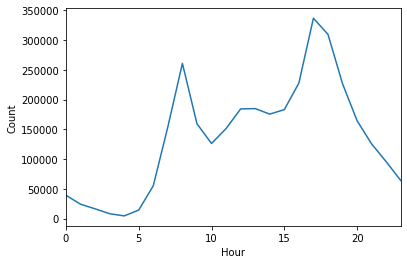

In [383]:
fig, ax = plt.subplots()
hr_cnt = hour.groupby(['hr']).cnt.agg({'max','min','mean','sum'})
print (hr_cnt.sort_values(by=['sum'],ascending=False))
hr_cnt['sum'].plot()
ax.set_xlabel('Hour')
ax.set_ylabel('Count')


            mean  min  max     sum
mnth                              
8     238.097627    1  941  351194
6     240.515278    1  900  346342
9     240.773138    1  977  345991
7     231.819892    1  913  344948
5     222.907258    1  873  331686
10    222.158511    1  963  322352
4     187.260960    1  822  269094
11    177.335421    1  729  254831
3     155.410726    1  957  228920
12    142.303439    1  759  211036
2     112.865026    1  610  151352
1      94.424773    1  559  134933


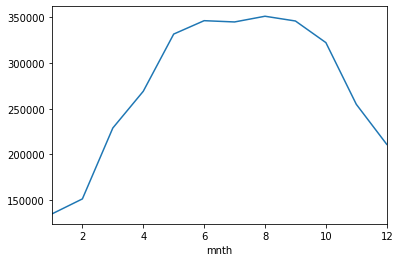

In [384]:
hr_mnth = hour.groupby(['mnth']).cnt.agg({'max','min','mean','sum'})
print (hr_mnth.sort_values(by=['sum'],ascending=False))
hr_mnth['sum'].plot()

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64


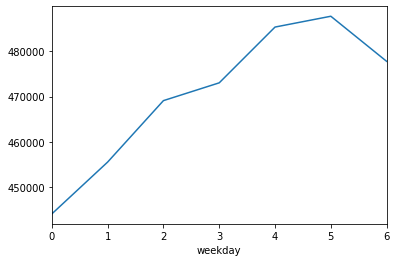

In [385]:
hr_weekday = hour.groupby(['weekday'])['cnt'].sum()
print (hr_weekday.sort_values(ascending=False))
hr_weekday.plot()

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64


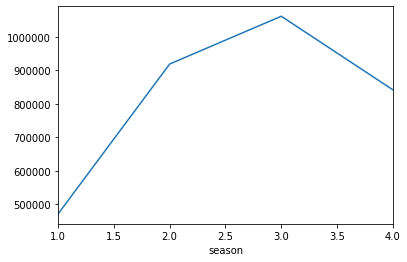

In [386]:
#season (1:winter, 2:spring, 3:summer, 4:fall)
hr_season = hour.groupby(['season'])['cnt'].sum()
print (hr_season.sort_values(ascending=False))
hr_season.plot()

In [387]:
hour.iloc[hour['cnt'].idxmax()]

instant            14774
dteday        2012-09-12
season                 3
yr                     1
mnth                   9
hr                    18
holiday                0
weekday                3
workingday             1
weathersit             1
temp                0.66
atemp             0.6212
hum                 0.44
windspeed         0.2537
casual                91
registered           886
cnt                  977
Name: 14773, dtype: object

In [388]:
day.iloc[day['cnt'].idxmax()]

instant              624
dteday        2012-09-15
season                 3
yr                     1
mnth                   9
holiday                0
weekday                6
workingday             0
weathersit             1
temp            0.608333
atemp           0.585867
hum             0.501667
windspeed       0.247521
casual              3160
registered          5554
cnt                 8714
Name: 623, dtype: object

In [389]:
hour[hour['dteday']=='2012-09-15']

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
14827    14828  2012-09-15       3   1     9   0        0        6   
14828    14829  2012-09-15       3   1     9   1        0        6   
14829    14830  2012-09-15       3   1     9   2        0        6   
14830    14831  2012-09-15       3   1     9   3        0        6   
14831    14832  2012-09-15       3   1     9   4        0        6   
14832    14833  2012-09-15       3   1     9   5        0        6   
14833    14834  2012-09-15       3   1     9   6        0        6   
14834    14835  2012-09-15       3   1     9   7        0        6   
14835    14836  2012-09-15       3   1     9   8        0        6   
14836    14837  2012-09-15       3   1     9   9        0        6   
14837    14838  2012-09-15       3   1     9  10        0        6   
14838    14839  2012-09-15       3   1     9  11        0        6   
14839    14840  2012-09-15       3   1     9  12        0        6   
14840    14841  2012-09-15       3   1     9  13        0        6   
14841    14842  2012-09-15       3   1     9  14        0        6   
14842    14843  2012-09-15       3   1     9  15        0        6   
14843    14844  2012-09-15       3   1     9  16        0        6   
14844    14845  2012-09-15       3   1     9  17        0        6   
14845    14846  2012-09-15       3   1     9  18        0        6   
14846    14847  2012-09-15       3   1     9  19        0        6   
14847    14848  2012-09-15       3   1     9  20        0        6   
14848    14849  2012-09-15       3   1     9  21        0        6   
14849    14850  2012-09-15       3   1     9  22        0        6   
14850    14851  2012-09-15       3   1     9  23        0        6   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
14827           0           1  0.60  0.5606  0.83     0.1045      38   
14828           0           1  0.60  0.5909  0.73     0.0000       8   
14829           0           1  0.58  0.5455  0.78     0.1045      18   
14830           0           1  0.60  0.5909  0.73     0.2537       6   
14831           0           2  0.60  0.5909  0.69     0.3582       3   
14832           0           1  0.58  0.5455  0.60     0.5224       1   
14833           0           1  0.54  0.5152  0.49     0.4179       6   
14834           0           1  0.54  0.5152  0.52     0.2836      10   
14835           0           1  0.56  0.5303  0.49     0.4179      43   
14836           0           1  0.60  0.6212  0.43     0.4179      79   
14837           0           1  0.62  0.6212  0.41     0.3881     119   
14838           0           1  0.64  0.6212  0.38     0.3881     228   
14839           0           1  0.66  0.6212  0.36     0.3582     287   
14840           0           1  0.68  0.6364  0.36     0.1940     327   
14841           0           1  0.68  0.6364  0.34     0.3284     325   
14842           0           2  0.68  0.6364  0.34     0.2836     312   
14843           0           2  0.66  0.6212  0.36     0.2239     350   
14844           0           2  0.66  0.6212  0.36     0.2537     295   
14845           0           2  0.64  0.6212  0.36     0.2836     232   
14846           0           1  0.62  0.6212  0.41     0.1642     169   
14847           0           1  0.60  0.6212  0.43     0.0896      89   
14848           0           1  0.56  0.5303  0.52     0.1045      86   
14849           0           1  0.56  0.5303  0.52     0.0000      82   
14850           0           1  0.54  0.5152  0.60     0.0000      47   

       registered  cnt  
14827         169  207  
14828         101  109  
14829          75   93  
14830          31   37  
14831           3    6  
14832          15   16  
14833          27   33  
14834          63   73  
14835         169  212  
14836         263  342  
14837         323  442  
14838         399  627  
14839         419  706  
14840         377  704  
14841         390  715  
14842         342  654  
14843         433  783  
14844

In [390]:
round(hour['registered'].sum()/hour['cnt'].sum()*100,2)

81.17

In [391]:
round(hour['casual'].sum()/hour['cnt'].sum()*100,2)

18.83

# denormalize (Temp, Windspeed, and hum)

In [392]:
#The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

hour['temp'] = (hour['temp']*47)-8
print (hour['temp'].min())
print(hour['temp'].max())


-7.06
39.0


In [393]:
#atemp: Normalized feeling temperature in Celsius. The values are derived 
#via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hour['atemp'] = (hour['atemp']*66)-16
print (hour['atemp'].min())
print(hour['atemp'].max())

-16.0
50.0


In [394]:
#Hum*100
hour['hum']=hour['hum']*100
#Windspeed *76
hour['windspeed']=hour['windspeed']*76

In [395]:
#Droping unused columns
#Holiday and Working day are the sam we will drop Holiday
#Casual and registered will not be used in this stude
hour.drop(['holiday','casual','registered'],axis=1,inplace=True)

In [396]:
hour['dteday']=pd.to_datetime(hour['dteday'], format='%Y-%m-%d', errors='raise', infer_datetime_format=False, exact=True)

In [397]:
SUNRISE = hour[['dteday','hr']]
SUNRISE['dteday'] = pd.to_datetime(SUNRISE['dteday'], format='%Y-%m-%d', errors='raise', infer_datetime_format=False, exact=True)

C:\Users\AbdulsalamFawzi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [398]:
from astral.geocoder import database, lookup

lookup("Washington DC", database())

LocationInfo(name='Washington DC', region='USA', timezone='US/Eastern', latitude=40.516666666666666, longitude=-77.03333333333333)

In [401]:
#Creating  A new column (SUN)
import datetime
from astral.sun import sun
from astral.geocoder import add_locations, database, lookup
from astral import LocationInfo
hour['sunrise']=1
hour['Sunset']=1
hour['SUN']=9
db=database
location = lookup("Washington DC", database())

#print(location)
for index, row in SUNRISE.iterrows():
    d= row['dteday'].date()
    s = sun(location.observer, d)
    if (row['hr'] >= (s['sunrise'].hour)-5) & (row['hr']<= (s['sunset'].hour)-5) : #if the time between the sunset and the sunrise 1 else 0
            hour.at[index ,'SUN'] = 1                                                #-5 to adjust the timezone
    else:
        hour.at[index ,'SUN'] =0
    
    hour.at[index,'sunrise'] = (s['sunrise'].hour)-5
    hour.at[index,'Sunset'] = (s['sunset'].hour)-5
    #dates_01['Sunset'].iloc[d]=s['sunset'].hour
print('Done! ')    


Done! 


In [402]:
hour['SUN'].value_counts()

0    11365
1     6014
Name: SUN, dtype: int64

In [403]:
hour.tail()

instant     dteday  season  yr  mnth  hr  weekday  workingday  \
17374    17375 2012-12-31       1   1    12  19        1           1   
17375    17376 2012-12-31       1   1    12  20        1           1   
17376    17377 2012-12-31       1   1    12  21        1           1   
17377    17378 2012-12-31       1   1    12  22        1           1   
17378    17379 2012-12-31       1   1    12  23        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  sunrise  Sunset  SUN  
17374           2  4.22  1.0016  60.0    12.4792  119        7      16    0  
17375           2  4.22  1.0016  60.0    12.4792   89        7      16    0  
17376           1  4.22  1.0016  60.0    12.4792   90        7      16    0  
17377           1  4.22  1.9982  56.0    10.2068   61        7      16    0  
17378           1  4.22  1.9982  65.0    10.2068   49        7      16    0

In [404]:
dates_01 = pd.DataFrame(pd.date_range(start='2013-01-01', end='2017-12-31', closed='left'))
dates_01.columns=['date_C']
print (dates_01)

         date_C
0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
4    2013-01-05
...         ...
1820 2017-12-26
1821 2017-12-27
1822 2017-12-28
1823 2017-12-29
1824 2017-12-30

[1825 rows x 1 columns]


In [405]:
hour['dteday'].describe

<bound method NDFrame.describe of 0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]>

In [406]:
#coorelation
corr = hour.corr()
print (corr)

             instant    season        yr      mnth        hr   weekday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.001357   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.002335   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867 -0.004485   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.010400   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000 -0.003498   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498  1.000000   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285  0.035955   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203  0.003311   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.001795   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.008821   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.037158   
windspeed  -0.074505 -0.149773 -0.008740 -0.135386  0.137252  0.011502   
cnt         0.278379  0.178056  0.2504

Text(0.5, 1, "Dataset featurs' Correlation  ")

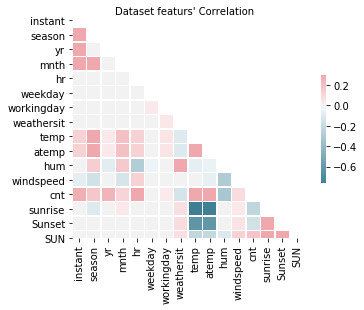

In [407]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Dataset featurs' Correlation  ", fontsize =10)

[Text(0, 0.5, 'Total Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Season - hourly distribution of counts')]

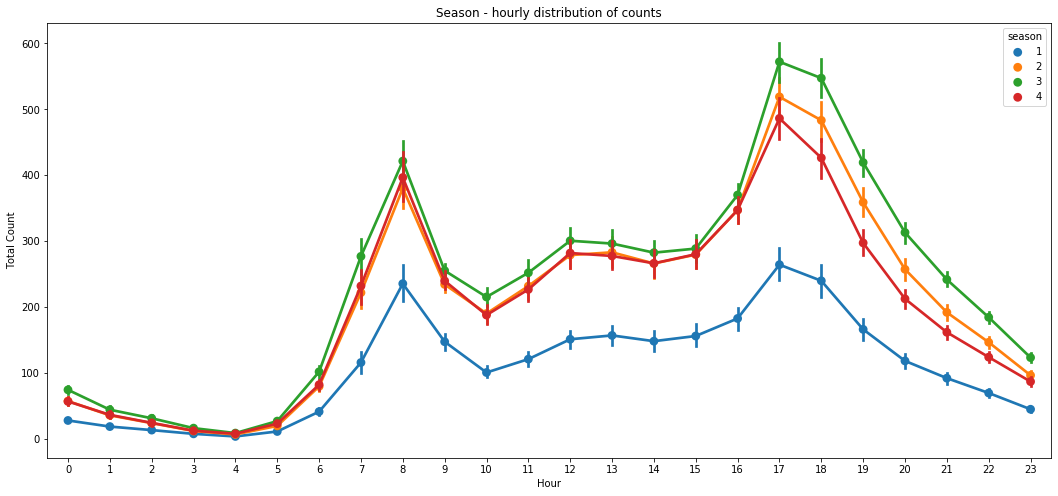

In [408]:
fig,ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.pointplot(data=hour[['hr','cnt','season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Season - hourly distribution of counts",xlabel='Hour',ylabel='Total Count')



[Text(0, 0.5, 'Total Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Weekday - hourly distribution of counts')]

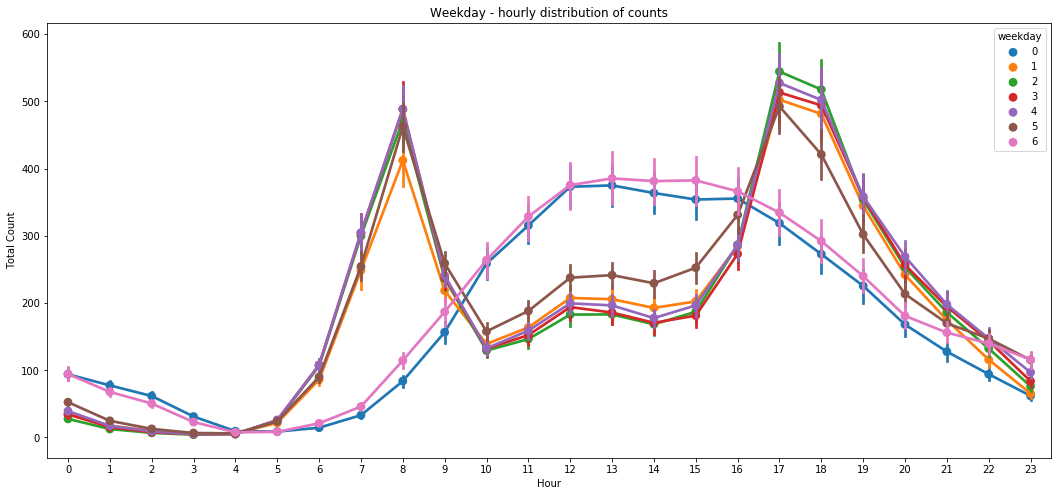

In [409]:
fig,ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.pointplot(data=hour[['hr',
                           'cnt',
                           'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday - hourly distribution of counts",xlabel='Hour',ylabel='Total Count')

In [410]:
#Checking for outliners

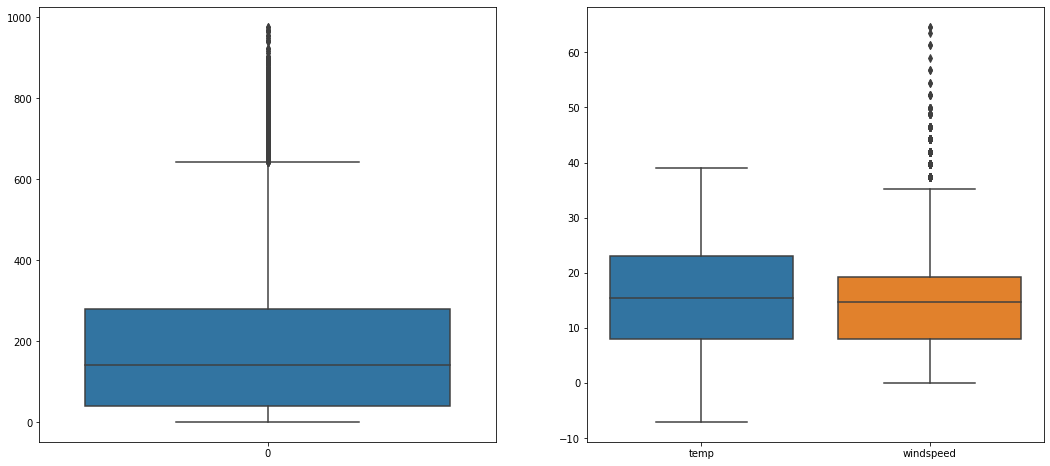

In [411]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(18, 8)
sns.boxplot(data=hour['cnt'],ax=ax1)
sns.boxplot(data=hour[['temp','windspeed']],ax=ax2)

In [412]:
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'sunrise', 'Sunset', 'SUN'],
      dtype='object')

In [413]:
hour.index=hour['dteday']

[Text(0, 0.5, 'Total Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Checking for outliners in day hours')]

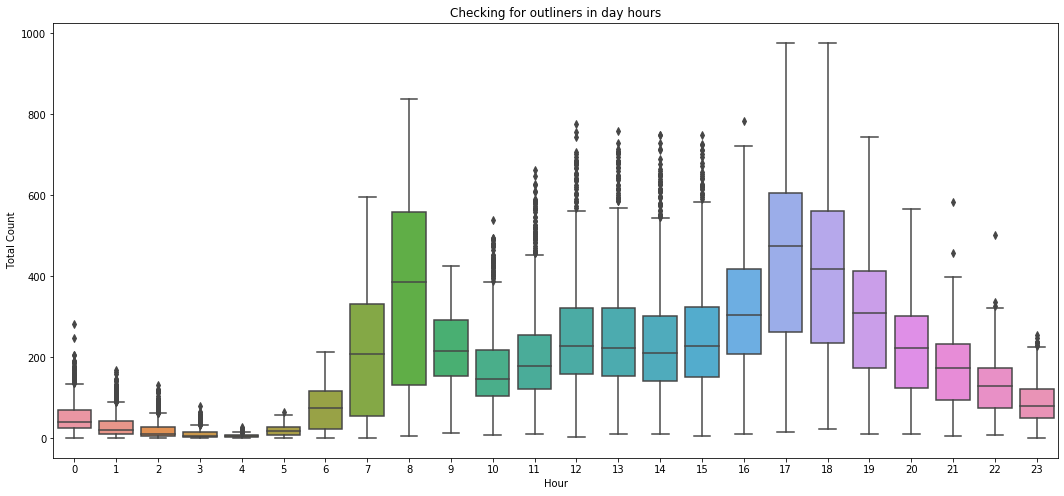

In [414]:
fig,ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.boxplot(data=hour[['cnt',
                          'hr']],x='hr',y='cnt',ax=ax)
ax.set(title="Checking for outliners in day hours",xlabel='Hour',ylabel='Total Count')

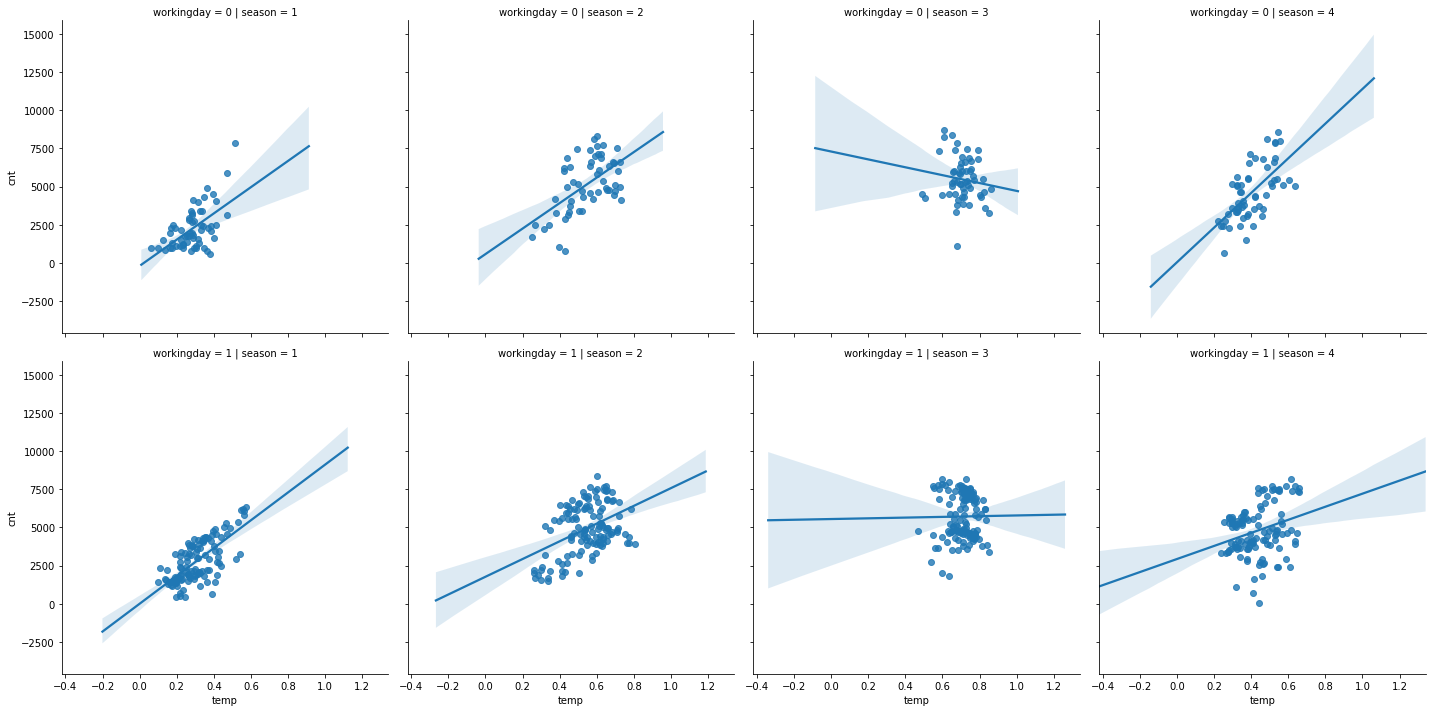

In [415]:
sns.lmplot('temp','cnt',row='workingday',col='season',data=day,palette='RdBu_r',fit_reg=True)

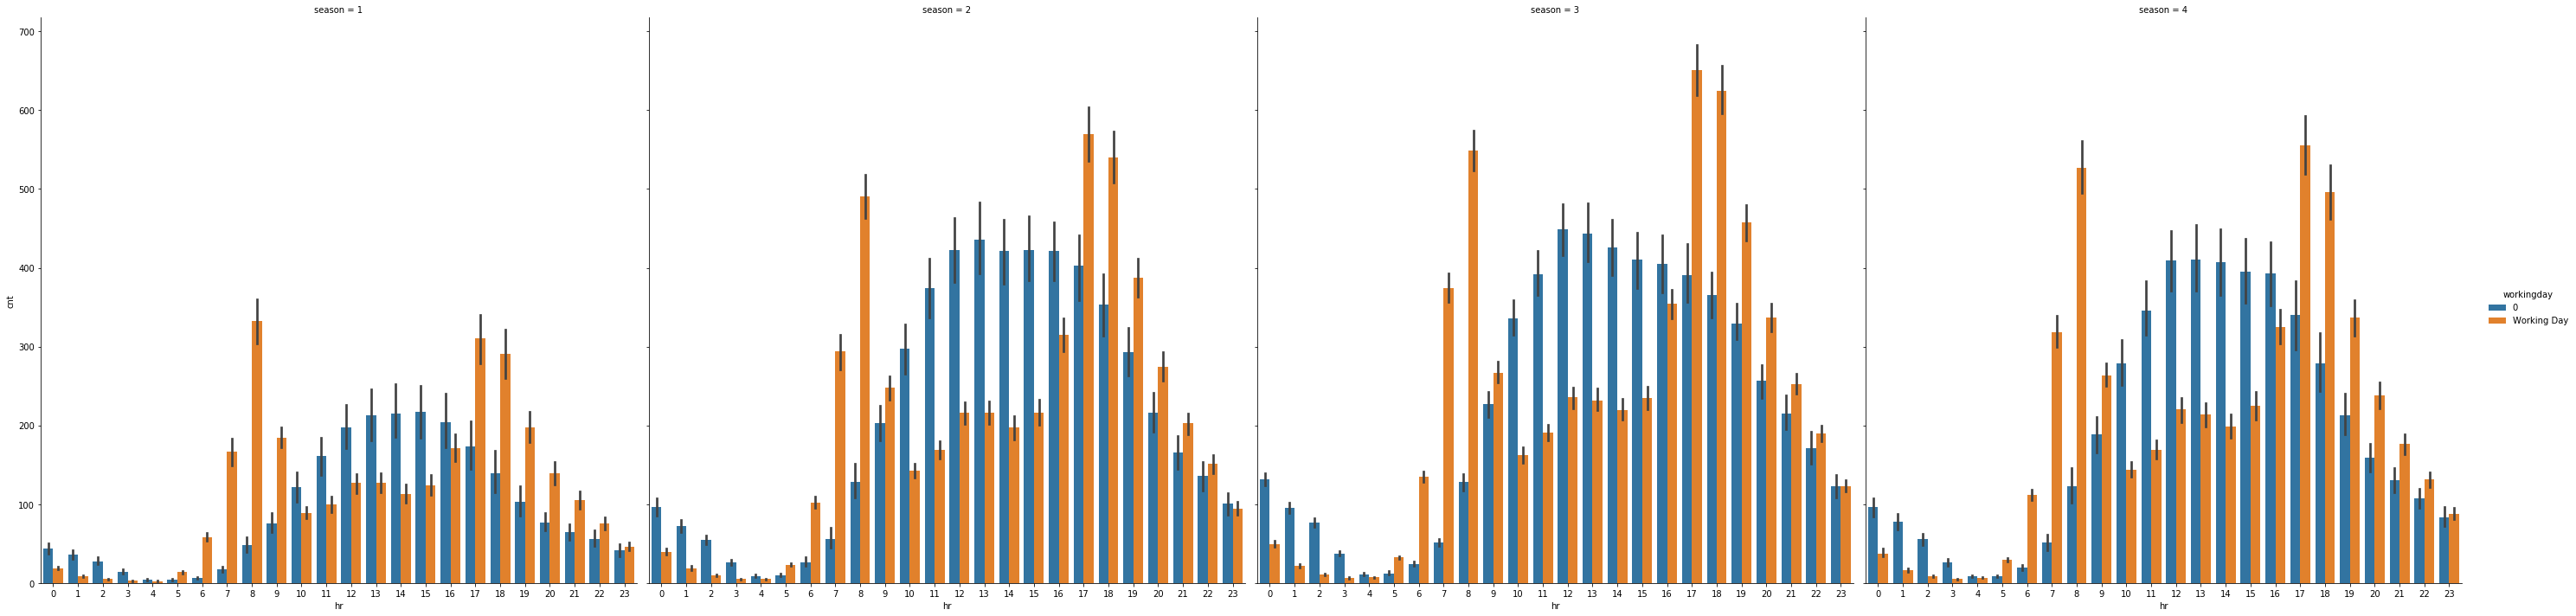

In [416]:
G1= hour
G1['workingday'] = np.where(G1['workingday'] == '0', 'Not Working Day', G1['workingday'])
G1['workingday'] = np.where(G1['workingday'] =='1', 'Working Day', G1['workingday'])
g = sns.catplot(x="hr", y="cnt",
                hue="workingday", col="season",
                data=G1, kind="bar",
                height=10, aspect=1)

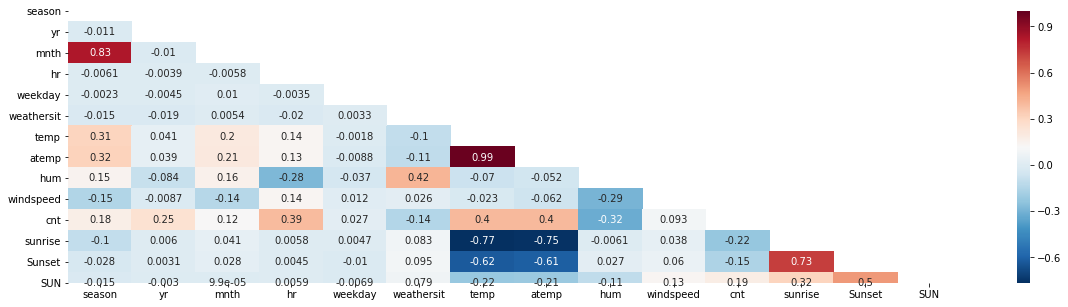

In [417]:
#not needed for the project
hour.drop('instant',axis=1,inplace=True)
plt.figure(figsize=(20,5))
mask = np.zeros_like(hour.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hour.corr(),cmap='RdBu_r',mask=mask, annot=True)

# Data Transformation


In [418]:
MOD_READY = hour

In [419]:
MOD_READY.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'sunrise',
       'Sunset', 'SUN'],
      dtype='object')

In [420]:
print(MOD_READY.columns)
MOD_READY.index= MOD_READY['dteday']

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'sunrise',
       'Sunset', 'SUN'],
      dtype='object')


In [421]:
#del MOD_READY['dteday']

In [422]:
MOD_READY = pd.get_dummies(MOD_READY, columns=['hr','season','workingday','weathersit','yr', 'mnth','SUN'],drop_first=False)

In [423]:
MOD_READY.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 59 columns):
dteday                    17379 non-null datetime64[ns]
weekday                   17379 non-null int64
temp                      17379 non-null float64
atemp                     17379 non-null float64
hum                       17379 non-null float64
windspeed                 17379 non-null float64
cnt                       17379 non-null int64
sunrise                   17379 non-null int64
Sunset                    17379 non-null int64
hr_0                      17379 non-null uint8
hr_1                      17379 non-null uint8
hr_2                      17379 non-null uint8
hr_3                      17379 non-null uint8
hr_4                      17379 non-null uint8
hr_5                      17379 non-null uint8
hr_6                      17379 non-null uint8
hr_7                      17379 non-null uint8
hr_8                      17379 non-null uint8
hr_9       

In [424]:
MOD_READY

dteday  weekday  temp   atemp   hum  windspeed  cnt  sunrise  \
dteday                                                                        
2011-01-01 2011-01-01        6  3.28  3.0014  81.0     0.0000   16        7   
2011-01-01 2011-01-01        6  2.34  1.9982  80.0     0.0000   40        7   
2011-01-01 2011-01-01        6  2.34  1.9982  80.0     0.0000   32        7   
2011-01-01 2011-01-01        6  3.28  3.0014  75.0     0.0000   13        7   
2011-01-01 2011-01-01        6  3.28  3.0014  75.0     0.0000    1        7   
...               ...      ...   ...     ...   ...        ...  ...      ...   
2012-12-31 2012-12-31        1  4.22  1.0016  60.0    12.4792  119        7   
2012-12-31 2012-12-31        1  4.22  1.0016  60.0    12.4792   89        7   
2012-12-31 2012-12-31        1  4.22  1.0016  60.0    12.4792   90        7   
2012-12-31 2012-12-31        1  4.22  1.9982  56.0    10.2068   61        7   
2012-12-31 2012-12-31        1  4.22  1.9982  65.0    10.2068   49        7   

            Sunset  hr_0  ...  mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  \
dteday                    ...                                           
2011-01-01      16     1  ...       0       0       0       0       0   
2011-01-01      16     0  ...       0       0       0       0       0   
2011-01-01      16     0  ...       0       0       0       0       0   
2011-01-01      16     0  ...       0       0       0       0       0   
2011-01-01      16     0  ...       0       0       0       0       0   
...            ...   ...  ...     ...     ...     ...     ...     ...   
2012-12-31      16     0  ...       0       0       0       0       0   
2012-12-31      16     0  ...       0       0       0       0       0   
2012-12-31      16     0  ...       0       0       0       0       0   
2012-12-31      16     0  ...       0       0       0       0       0   
2012-12-31      16     0  ...       0       0       0       0       0   

            mnth_10  mnth_11  mnth_12  SUN_0  SUN_1  
dteday                                               
2011-01-01        0        0        0      1      0  
2011-01-01        0        0        0      1      0  
2011-01-01        0        0        0      1      0  
2011-01-01        0        0        0      1      0  
2011-01-01        0        0        0      1      0  
...             ...      ...      ...    ...    ...  
2012-12-31        0        0        1      1      0  
2012-12-31        0        0        1      1      0  
2012-12-31        0        0        1      1      0  
2012-12-31        0        0        1      1      0  
2012-12-31        0        0        1      1      0  

[17379 rows x 59 columns]

In [425]:
MOD_READY_CORR = MOD_READY.corr()

In [426]:
MOD_READY_CORR['cnt']

weekday                   0.026900
temp                      0.404772
atemp                     0.400929
hum                      -0.322911
windspeed                 0.093234
cnt                       1.000000
sunrise                  -0.223653
Sunset                   -0.151985
hr_0                     -0.156054
hr_1                     -0.179420
hr_2                     -0.190250
hr_3                     -0.200296
hr_4                     -0.206352
hr_5                     -0.193936
hr_6                     -0.130467
hr_7                      0.026036
hr_8                      0.195313
hr_9                      0.034382
hr_10                    -0.018195
hr_11                     0.021519
hr_12                     0.073609
hr_13                     0.074060
hr_14                     0.059395
hr_15                     0.071259
hr_16                     0.141443
hr_17                     0.313996
hr_18                     0.272114
hr_19                     0.140710
hr_20               

In [427]:
print(*MOD_READY.columns)

dteday weekday temp atemp hum windspeed cnt sunrise Sunset hr_0 hr_1 hr_2 hr_3 hr_4 hr_5 hr_6 hr_7 hr_8 hr_9 hr_10 hr_11 hr_12 hr_13 hr_14 hr_15 hr_16 hr_17 hr_18 hr_19 hr_20 hr_21 hr_22 hr_23 season_1 season_2 season_3 season_4 workingday_0 workingday_Working Day weathersit_1 weathersit_2 weathersit_3 weathersit_4 yr_0 yr_1 mnth_1 mnth_2 mnth_3 mnth_4 mnth_5 mnth_6 mnth_7 mnth_8 mnth_9 mnth_10 mnth_11 mnth_12 SUN_0 SUN_1


In [428]:
MOD_READY.rename(columns={'workingday_Working Day':'workingday_1'}, inplace=True)

In [429]:
MOD_READY.mean()

weekday           3.003683
temp             15.358397
atemp            15.401157
hum              62.722884
windspeed        14.447418
cnt             189.463088
sunrise           5.517521
Sunset           10.147995
hr_0              0.041775
hr_1              0.041659
hr_2              0.041142
hr_3              0.040106
hr_4              0.040106
hr_5              0.041257
hr_6              0.041717
hr_7              0.041832
hr_8              0.041832
hr_9              0.041832
hr_10             0.041832
hr_11             0.041832
hr_12             0.041890
hr_13             0.041947
hr_14             0.041947
hr_15             0.041947
hr_16             0.042005
hr_17             0.042005
hr_18             0.041890
hr_19             0.041890
hr_20             0.041890
hr_21             0.041890
hr_22             0.041890
hr_23             0.041890
season_1          0.244088
season_2          0.253697
season_3          0.258703
season_4          0.243512
workingday_0      0.317279
w

In [430]:
### STATSMODELS ###
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
# create a fitted model
ML = smf.ols(formula='cnt ~ hr_0 + hr_1 +hr_2+ hr_3+ hr_4 +hr_5 +hr_6+ hr_7+ hr_8+ hr_9+ hr_10+ hr_11+ hr_12+ hr_13+ hr_14+ hr_15+ hr_16+ hr_17 +hr_18 +hr_19+ hr_20+ hr_21+ hr_22+ hr_23 + season_1 + season_2 + season_3 + season_4 + workingday_0 + workingday_1 + weathersit_1 + weathersit_2 + weathersit_3+ weathersit_4 + temp + atemp + hum + windspeed + yr_0 +yr_1+ mnth_1+ mnth_2+ mnth_3+ mnth_4+ mnth_5+ mnth_6+ mnth_7 +mnth_8+ mnth_9+ mnth_10+ mnth_11+ mnth_12+ SUN_0 +SUN_1', data=MOD_READY).fit()

# print the coefficients
ML.params

Intercept        49.277633
hr_0           -119.829728
hr_1           -137.112552
hr_2           -146.143786
hr_3           -156.819906
hr_4           -160.042358
hr_5           -144.578600
hr_6            -87.430841
hr_7             45.872917
hr_8            186.230066
hr_9             38.469899
hr_10           -16.250721
hr_11             9.087321
hr_12            48.327436
hr_13            43.255982
hr_14            27.389531
hr_15            36.841011
hr_16            98.968938
hr_17           253.937941
hr_18           223.735165
hr_19           116.900613
hr_20            37.317805
hr_21           -12.084993
hr_22           -48.991097
hr_23           -87.772409
season_1        -22.615217
season_2         15.599110
season_3          9.827292
season_4         46.466447
workingday_0     21.145335
workingday_1     28.132298
weathersit_1     45.531488
weathersit_2     35.410940
weathersit_3    -18.966134
weathersit_4    -12.698661
temp              2.547072
atemp             1.859921
h

In [431]:
print(ML.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     803.0
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:08:32   Log-Likelihood:            -1.0499e+05
No. Observations:               17379   AIC:                         2.101e+05
Df Residuals:                   17331   BIC:                         2.105e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       49.2776      5.074      9.711   

In [432]:
ML.predict({'hr_0':[0],'hr_1':[0], 'hr_2':[0],'hr_3':[0], 'hr_4':[0], 'hr_5':[0], 'hr_6':[0], 'hr_7':[0], 'hr_8':[0], 'hr_9':[0], 'hr_10':[0],
       'hr_11':[0], 'hr_12':[1], 'hr_13':[0], 'hr_14':[0], 'hr_15':[0], 'hr_16':[0], 'hr_17':[0], 'hr_18':[0],
       'hr_19':[0], 'hr_20':[0], 'hr_21':[0], 'hr_22':[0], 'hr_23':[0],'season_1':[0],'season_2':[1],'season_3':[0],'season_4':[0]
        ,'workingday_0':[1],'workingday_1':[0],'weathersit_1':[1],'weathersit_2':[0],'weathersit_3':[0],'weathersit_4':[0],'temp':[15.35],'atemp':[15.4] , 'hum':[62.7] , 'windspeed':[14.44],'yr_0':[0],'yr_1':[1], 'mnth_1':[0], 'mnth_2':[0], 'mnth_3':[0], 'mnth_4':[0], 'mnth_5':[0], 'mnth_6':[1], 'mnth_7':[0],'mnth_8':[0], 'mnth_9':[0], 'mnth_10':[0], 'mnth_11':[0], 'mnth_12':[0], 'SUN_0':[0],'SUN_1':[1]   })

0    291.552465
dtype: float64

In [433]:
# create X and y
feature_cols = [ 'temp','hr_0','hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23','season_1' ,'season_2', 'season_3',
       'season_4', 'workingday_0','workingday_1', 'weathersit_1','weathersit_2', 'weathersit_3','atemp', 'hum' , 'windspeed',
       'weathersit_4','yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'SUN_0', 'SUN_1']
X_ML2 = MOD_READY[feature_cols]
y_ML2 = MOD_READY.cnt

# instantiate and fit
ML2 = LinearRegression()
ML2.fit(X_ML2, y_ML2)

# print the coefficients
print (ML2.intercept_)
print (ML2.coef_)

340261651116.43854
[ 2.54714568e+00 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11
 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11
 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11
 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11
 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11
 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11 -1.66335070e+11
 -1.66335070e+11 -4.02018962e+10 -4.02018961e+10 -4.02018961e+10
 -4.02018961e+10 -4.48099793e+10 -4.48099793e+10 -3.26557285e+09
 -3.26557286e+09 -3.26557291e+09  1.85983276e+00 -8.49304199e-01
 -3.88549805e-01 -3.26557291e+09 -9.56693604e+09 -9.56693596e+09
 -2.73100545e+10 -2.73100545e+10 -2.73100545e+10 -2.73100545e+10
 -2.73100545e+10 -2.73100545e+10 -2.73100545e+10 -2.73100545e+10
 -2.73100545e+10 -2.73100545e+10 -2.73100545e+10 -2.73100545e+10
 -4.87721419e+10 -4.87721419e+10]


In [434]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({ 'temp':[0.26],'hr_0':[0],'hr_1':[0], 'hr_2':[0],'hr_3':[0], 'hr_4':[0], 'hr_5':[0], 'hr_6':[0], 'hr_7':[0], 'hr_8':[0], 'hr_9':[0], 'hr_10':[0],
       'hr_11':[0], 'hr_12':[1], 'hr_13':[0], 'hr_14':[0], 'hr_15':[0], 'hr_16':[0], 'hr_17':[0], 'hr_18':[0],
       'hr_19':[0], 'hr_20':[0], 'hr_21':[0], 'hr_22':[0], 'hr_23':[0],'season_1':[0] ,'season_2':[1], 'season_3':[0],
       'season_4':[0], 'workingday_0':[1],'workingday_1':[0], 'weathersit_1':[1],'weathersit_2':[0], 'weathersit_3':[0],'weathersit_4':[0],'atemp':[15.4] , 'hum':[62.7] , 'windspeed':[14.44],'yr_0':[0],'yr_1':[1], 'mnth_1':[0], 'mnth_2':[0], 'mnth_3':[0], 'mnth_4':[0], 'mnth_5':[0], 'mnth_6':[1], 'mnth_7':[0],'mnth_8':[0], 'mnth_9':[0], 'mnth_10':[0], 'mnth_11':[0], 'mnth_12':[0], 'SUN_0':[0],'SUN_1':[1] })

# predict for a new observation
ML2.predict(X_new)

array([-4.71548725e+10])

In [435]:
x_ML2 = ML2.predict(X_ML2)

In [436]:
MOD_READY['cnt_predect']=x_ML2

In [437]:
MOD_READY.tail()

dteday  weekday  temp   atemp   hum  windspeed  cnt  sunrise  \
dteday                                                                        
2012-12-31 2012-12-31        1  4.22  1.0016  60.0    12.4792  119        7   
2012-12-31 2012-12-31        1  4.22  1.0016  60.0    12.4792   89        7   
2012-12-31 2012-12-31        1  4.22  1.0016  60.0    12.4792   90        7   
2012-12-31 2012-12-31        1  4.22  1.9982  56.0    10.2068   61        7   
2012-12-31 2012-12-31        1  4.22  1.9982  65.0    10.2068   49        7   

            Sunset  hr_0  ...  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  \
dteday                    ...                                            
2012-12-31      16     0  ...       0       0       0       0        0   
2012-12-31      16     0  ...       0       0       0       0        0   
2012-12-31      16     0  ...       0       0       0       0        0   
2012-12-31      16     0  ...       0       0       0       0        0   
2012-12-31      16     0  ...       0       0       0       0        0   

            mnth_11  mnth_12  SUN_0  SUN_1  cnt_predect  
dteday                                                   
2012-12-31        0        1      1      0   242.979309  
2012-12-31        0        1      1      0   163.396545  
2012-12-31        0        1      1      0   124.113098  
2012-12-31        0        1      1      0    93.340881  
2012-12-31        0        1      1      0    46.915710  

[5 rows x 60 columns]

In [438]:
del MOD_READY['dteday']

Text(0, 0.5, 'Data')

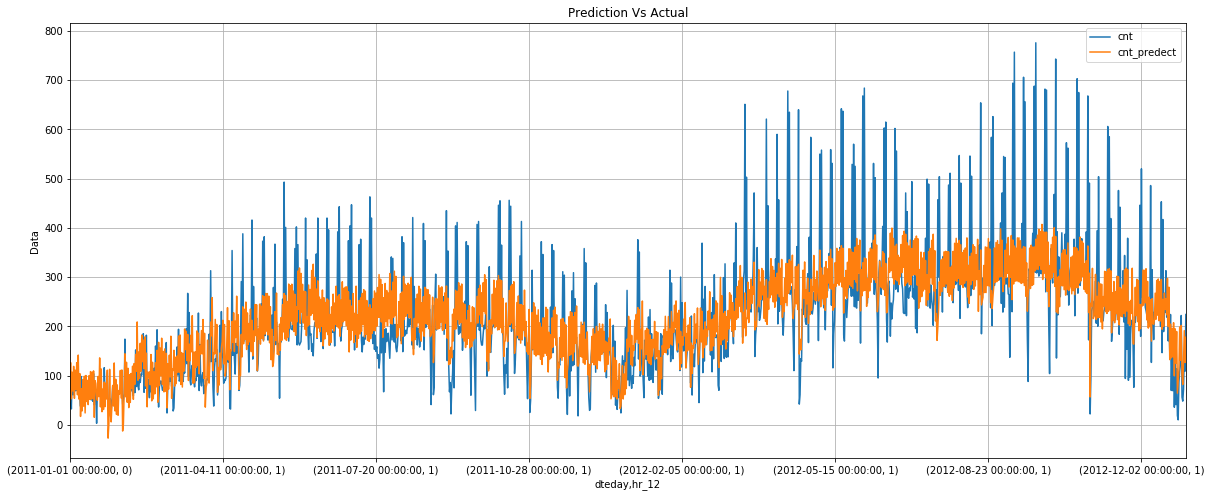

In [439]:
Model_Plot = MOD_READY.pivot_table(index=['dteday','hr_12'] , margins=False ,values=['cnt',  'cnt_predect'],aggfunc=np.mean)
Model_Plot.plot(figsize=(20,8), title="Prediction Vs Actual", grid=True)
plt.ylabel('Data')

In [440]:
#using train test split 
feature_cols = [ 'hr_0','hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23','season_1' ,'season_2', 'season_3',
       'season_4', 'workingday_0','workingday_1', 'weathersit_1','weathersit_2', 'weathersit_3','atemp', 'hum' , 'windspeed',
       'weathersit_4','yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'SUN_0', 'SUN_1']

X = MOD_READY[feature_cols]
y = MOD_READY.cnt
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13903, 53) (13903,)
(3476, 53) (3476,)


In [441]:
# fit a model
from sklearn.metrics import mean_squared_error
from math import sqrt
lm = linear_model.LinearRegression()
model_FIT = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [442]:
print ('Score:', model_FIT.score(X_test, y_test))
y_pred = lm.predict(X_test)
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.6844748538315247
RMSE: 103.45


# without feature Engineering

In [443]:
feature_cols = ['hr','season']
X_N = hour[feature_cols]
y_N = hour.cnt
# create training and testing vars
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X_N, y_N, test_size=0.2)
print (X_train_N.shape, y_train_N.shape)
print (X_test_N.shape, y_test_N.shape)

(13903, 2) (13903,)
(3476, 2) (3476,)


In [444]:
lm_N = linear_model.LinearRegression()
model_N = lm_N.fit(X_train_N, y_train_N)
predictions_N = lm_N.predict(X_test_N)

In [445]:
print ('Score:', model_N.score(X_test_N, y_test_N))

Score: 0.180783025011468


In [446]:
print ('Score:', model_N.score(X_train_N, y_train_N))
y_pred_N = model_N.predict(X_test_N)
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test_N, y_pred_N)))

Score: 0.1896164484779861
RMSE: 165.41


# data transforamtion / scaling (Hour Column) temp atem,hum, and windspeed


In [447]:
scaled_hour=hour
#df.index = df['dteday']


In [448]:
#Normalizing the hour columns
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['hr','temp','atemp','hum','windspeed']
scaled_hour[cols_to_norm] = StandardScaler().fit_transform(scaled_hour[cols_to_norm])

In [449]:
#Feature Engineering for the categorical columns 
scaled_hour = pd.get_dummies(scaled_hour, columns=['season','workingday','weathersit'],drop_first=False)

In [450]:
scaled_hour.head()

dteday  yr  mnth        hr  weekday      temp     atemp  \
dteday                                                                   
2011-01-01 2011-01-01   0     1 -1.670004        6 -1.334648 -1.093281   
2011-01-01 2011-01-01   0     1 -1.525374        6 -1.438516 -1.181732   
2011-01-01 2011-01-01   0     1 -1.380744        6 -1.438516 -1.181732   
2011-01-01 2011-01-01   0     1 -1.236115        6 -1.334648 -1.093281   
2011-01-01 2011-01-01   0     1 -1.091485        6 -1.334648 -1.093281   

                 hum  windspeed  cnt  ...  season_1  season_2  season_3  \
dteday                                ...                                 
2011-01-01  0.947372  -1.553889   16  ...         1         0         0   
2011-01-01  0.895539  -1.553889   40  ...         1         0         0   
2011-01-01  0.895539  -1.553889   32  ...         1         0         0   
2011-01-01  0.636370  -1.553889   13  ...         1         0         0   
2011-01-01  0.636370  -1.553889    1  ...         1         0         0   

            season_4  workingday_0  workingday_Working Day  weathersit_1  \
dteday                                                                     
2011-01-01         0             1                       0             1   
2011-01-01         0             1                       0             1   
2011-01-01         0             1                       0             1   
2011-01-01         0             1                       0             1   
2011-01-01         0             1                       0             1   

            weathersit_2  weathersit_3  weathersit_4  
dteday                                                
2011-01-01             0             0             0  
2011-01-01             0             0             0  
2011-01-01             0             0             0  
2011-01-01             0             0             0  
2011-01-01             0             0             0  

[5 rows x 23 columns]

In [451]:
scaled_hour.columns

Index(['dteday', 'yr', 'mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'sunrise', 'Sunset', 'SUN', 'season_1', 'season_2',
       'season_3', 'season_4', 'workingday_0', 'workingday_Working Day',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [452]:

scaled_hour.rename(columns={'workingday_Working Day':'workingday_1'}, inplace=True)

In [453]:
# Model With scaled Hours and categorical features
feature_cols = ['hr','season_1', 'season_2', 'season_3','season_4', 'workingday_1',
                'weathersit_1','weathersit_2', 'weathersit_3','temp','atemp','hum','windspeed','SUN']
X_scaled_hour = scaled_hour[feature_cols]
y_scaled_hour = scaled_hour.cnt
# create training and testing vars
X_train_Scaled, X_test_Scaled, y_train_Scaled, y_test_Scaled = train_test_split(X_scaled_hour, y_scaled_hour, test_size=0.2)
print (X_train_Scaled.shape, y_train_Scaled.shape)
print (X_test_Scaled.shape, y_test_Scaled.shape)

(13903, 14) (13903,)
(3476, 14) (3476,)


In [454]:
lm_scaled_hour = linear_model.LinearRegression()
model_scaled_hour = lm_scaled_hour.fit(X_train_Scaled, y_train_Scaled)
predictions_scaled_hour = lm_scaled_hour.predict(X_test_Scaled)

In [455]:
print ('Score:', model_scaled_hour.score(X_train_Scaled, y_train_Scaled))

Score: 0.4083586598726573


In [456]:
y_pred_Scaled = model_scaled_hour.predict(X_test_Scaled)
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test_Scaled, y_pred_Scaled)))

RMSE: 142.04


In [457]:
#Hour Normalized model
scaled_Hours_Model_Score =  model_scaled_hour.score(X_train_Scaled, y_train_Scaled)
scaled_Hours_Model_RMSE = sqrt(mean_squared_error(y_test_Scaled, y_pred_Scaled))

In [458]:
#train test split Model score

FIT_Model_Score = model_FIT.score(X_test, y_test)

FIT_Hours_Model_RMSE= sqrt(mean_squared_error(y_test, y_pred))


In [459]:
#Model Without feature engineering 
Model_NO_FEATURE_Score =model_N.score(X_train_N, y_train_N)
y_pred_N = model_N.predict(X_test_N)
Hours_NO_FEATURE_SModel_RMSE =sqrt(mean_squared_error(y_test_N, y_pred_N))



# Random Forest

In [460]:
from sklearn.model_selection import train_test_split
feature_cols = [ 'hr_0','hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23','season_1' ,'season_2', 'season_3',
       'season_4', 'workingday_0','workingday_1', 'weathersit_1','weathersit_2', 'weathersit_3','atemp', 'hum' , 'windspeed',
       'weathersit_4','yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'SUN_0', 'SUN_1']

X_R = MOD_READY[feature_cols]
y_R = MOD_READY.cnt
# create training and testing vars


X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size=0.2, random_state=0)

In [461]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_R = sc.fit_transform(X_train_R)
X_test_R = sc.transform(X_test_R)

In [462]:
from sklearn.ensemble import RandomForestRegressor

regressor_RF = RandomForestRegressor(n_estimators=20, random_state=0)
regressor_RF.fit(X_train_R, y_train_R)
y_pred_R = regressor_RF.predict(X_test_R)

In [463]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_R, y_pred_R))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_R, y_pred_R))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_R, y_pred_R)))

regressor_RF_SCORE = regressor_RF.score( X_test_R, y_test_R, sample_weight=None)
print(regressor_RF_SCORE)
y_pred_RF=regressor_RF.predict(X_test_R)

regressor_RF_SCORE_RMSE= sqrt(mean_squared_error(y_test_R, y_pred_RF))

Mean Absolute Error: 33.432106382541505
Mean Squared Error: 2925.710200523883
Root Mean Squared Error: 54.08983453962383
0.9123227872539165


In [464]:
x_R_P = regressor_RF.predict(X_R)

In [465]:
MOD_READY['cnt_predect_R']=x_R_P

# Decision Tree Classifications

In [466]:
#Decision Tree Classifications
feature_cols = [ 'hr_0','hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23','season_1' ,'season_2', 'season_3',
       'season_4', 'workingday_0','workingday_1', 'weathersit_1','weathersit_2', 'weathersit_3','atemp', 'hum' , 'windspeed',
       'weathersit_4','yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'SUN_0', 'SUN_1']

X_DR = MOD_READY[feature_cols]
y_DR = MOD_READY.cnt
# create training and testing vars
X_train_DR, X_test_DR, y_train_DR, y_test_DR = train_test_split(X_DR, y_DR, test_size=0.2)
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor_DR = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor_DR.fit(X_train_DR,y_train_DR)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [473]:
y_pred_DR_1 = regressor_DR.predict(X_DR)
MOD_READY['CNT_DR'] =y_pred_DR_1

In [468]:
regressor_DR_SCORE = regressor_DR.score( X_test_DR, y_test_DR, sample_weight=None)
print(regressor_DR_SCORE)
y_pred_DR=regressor_DR.predict(X_test_DR)

regressor_DR_SCORE_RMSE= sqrt(mean_squared_error(y_test_DR, y_pred_DR))

0.8461972457678911


In [ ]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(regressor_DR, out_file=None, feature_names=MOD_READY[feature_cols].columns))


In [ ]:
#graph = Source( tree.export_graphviz(regressor_DR, out_file=None, feature_names=MOD_READY[feature_cols].columns))
#png_bytes = graph.pipe(format='png')
#with open('dtree_pipe.png','wb') as f:
#    f.write(png_bytes)
#
#from IPython.display import Image
#Image(png_bytes)

# Models comparison 

In [470]:
Model_Scores = pd.DataFrame([ ['Linear regression with Normalized hours model', scaled_Hours_Model_Score,scaled_Hours_Model_RMSE],['Linear Reg with Train test split Model',FIT_Model_Score,FIT_Hours_Model_RMSE ],
                             ['Model Without feature engineering',Model_NO_FEATURE_Score,Hours_NO_FEATURE_SModel_RMSE ],['Decision Tree Classifications',regressor_DR_SCORE,regressor_DR_SCORE_RMSE],['Random Forest'
,regressor_RF_SCORE,regressor_RF_SCORE_RMSE]], columns=['Model', 'Score', 'RMSE'])

print(Model_Scores)

                                           Model     Score        RMSE
0  Linear regression with Normalized hours model  0.408359  142.037700
1         Linear Reg with Train test split Model  0.684475  103.451682
2              Model Without feature engineering  0.189616  165.413383
3                  Decision Tree Classifications  0.846197   71.558566
4                                  Random Forest  0.912323   54.089835


In [471]:
MOD_READY.head()

weekday  temp   atemp   hum  windspeed  cnt  sunrise  Sunset  \
dteday                                                                     
2011-01-01        6  3.28  3.0014  81.0        0.0   16        7      16   
2011-01-01        6  2.34  1.9982  80.0        0.0   40        7      16   
2011-01-01        6  2.34  1.9982  80.0        0.0   32        7      16   
2011-01-01        6  3.28  3.0014  75.0        0.0   13        7      16   
2011-01-01        6  3.28  3.0014  75.0        0.0    1        7      16   

            hr_0  hr_1  ...  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  SUN_0  \
dteday                  ...                                                     
2011-01-01     1     0  ...       0       0        0        0        0      1   
2011-01-01     0     1  ...       0       0        0        0        0      1   
2011-01-01     0     0  ...       0       0        0        0        0      1   
2011-01-01     0     0  ...       0       0        0        0        0      1   
2011-01-01     0     0  ...       0       0        0        0        0      1   

            SUN_1  cnt_predect  cnt_predect_R  CNT_DR  
dteday                                                 
2011-01-01      0   -81.919006      89.016667    16.0  
2011-01-01      0  -102.621033      87.866667    40.0  
2011-01-01      0  -111.649597      87.866667    32.0  
2011-01-01      0  -113.815979      89.016667    13.0  
2011-01-01      0  -117.041931      89.016667     1.0  

[5 rows x 61 columns]

# lets print the results for the original count, prediction using train test and the prediction using Random Forest in all hours grouped by month(max,min,and mean)

C:\Users\AbdulsalamFawzi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


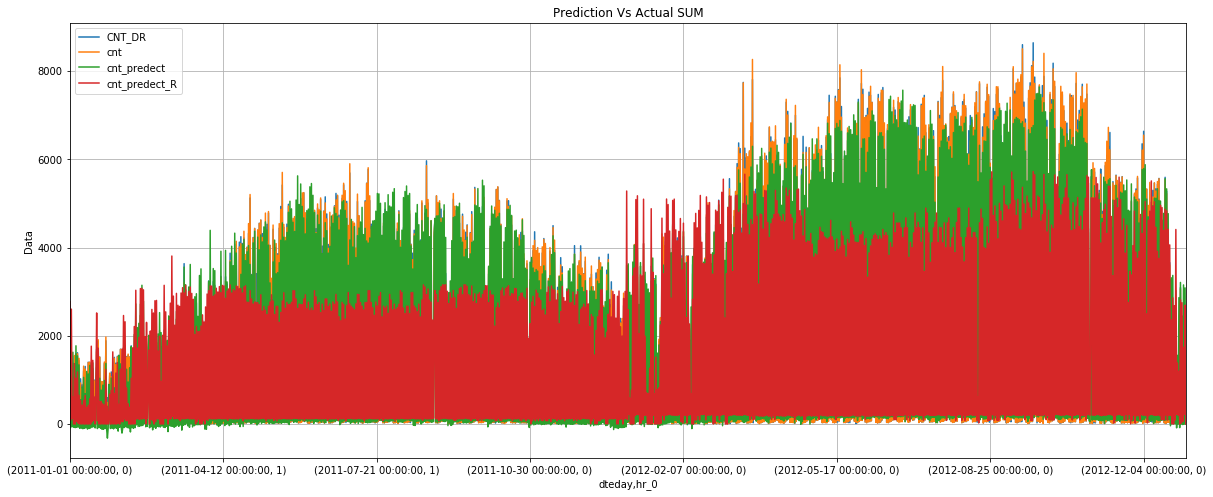

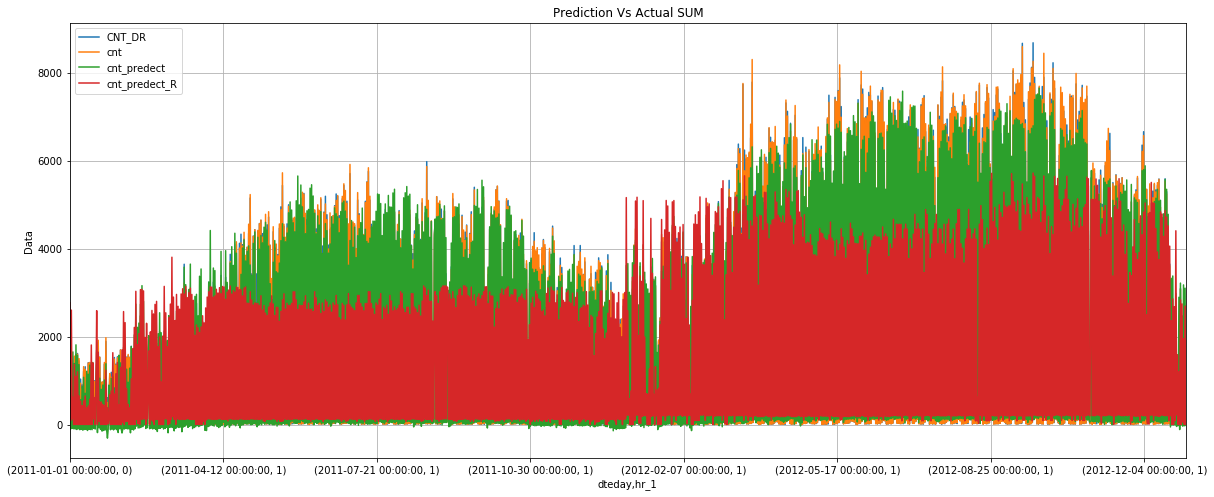

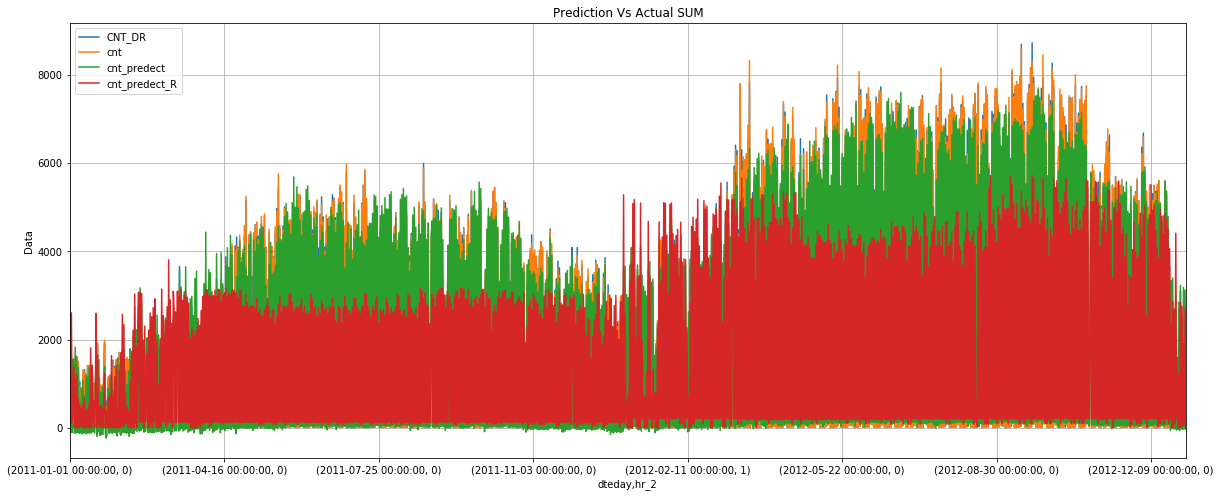

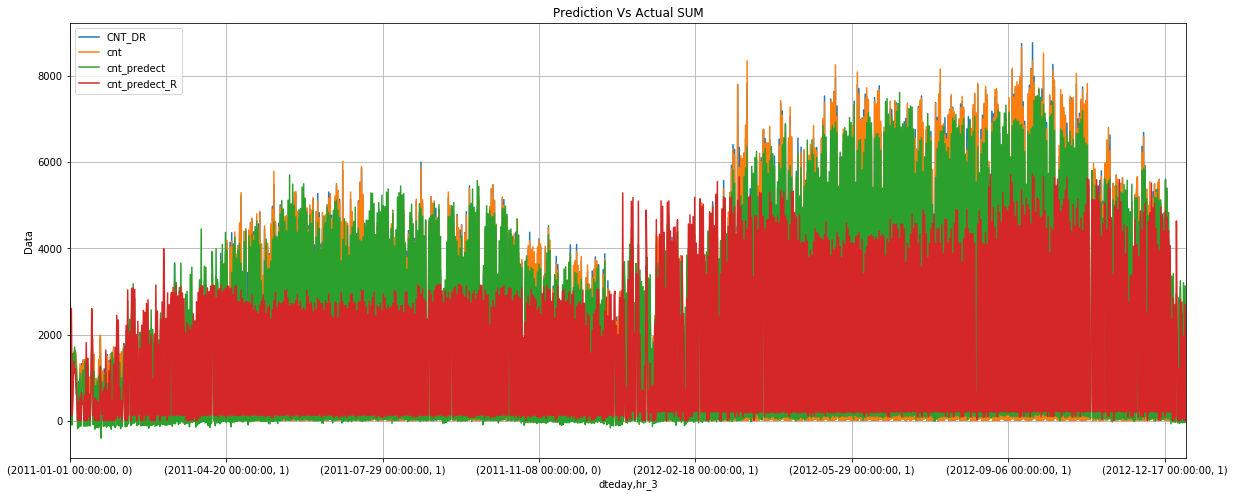

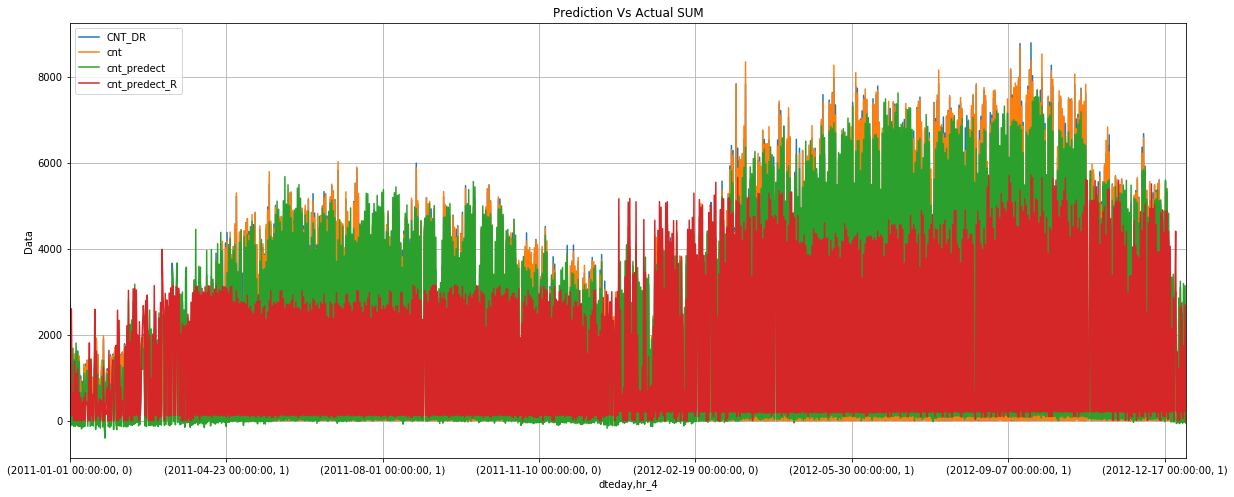

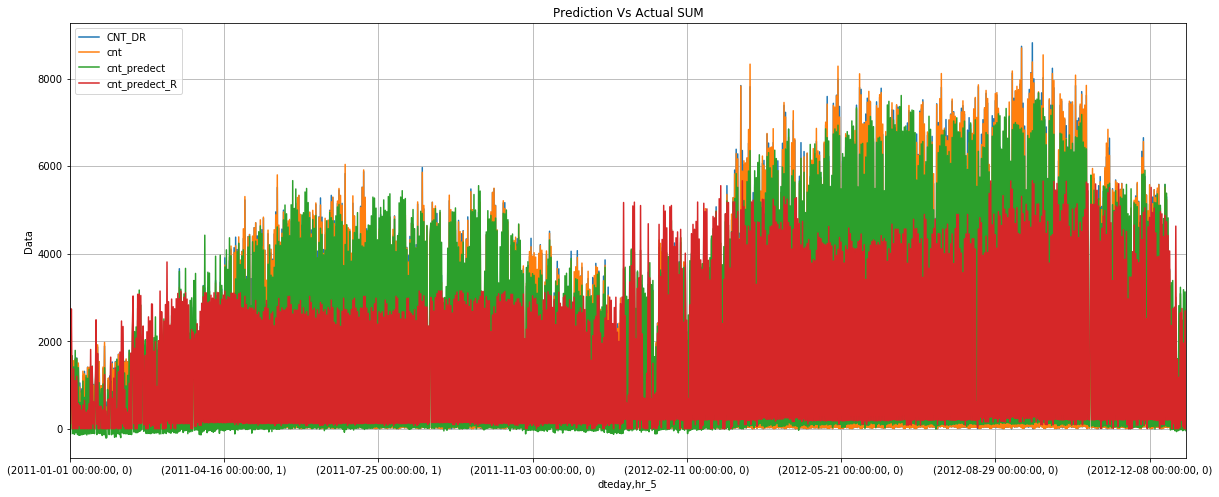

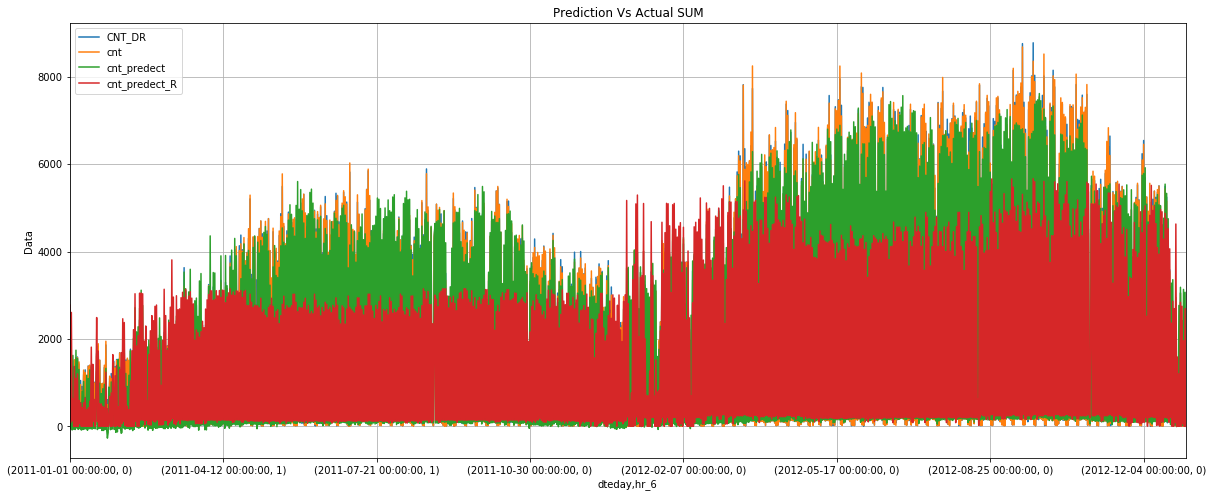

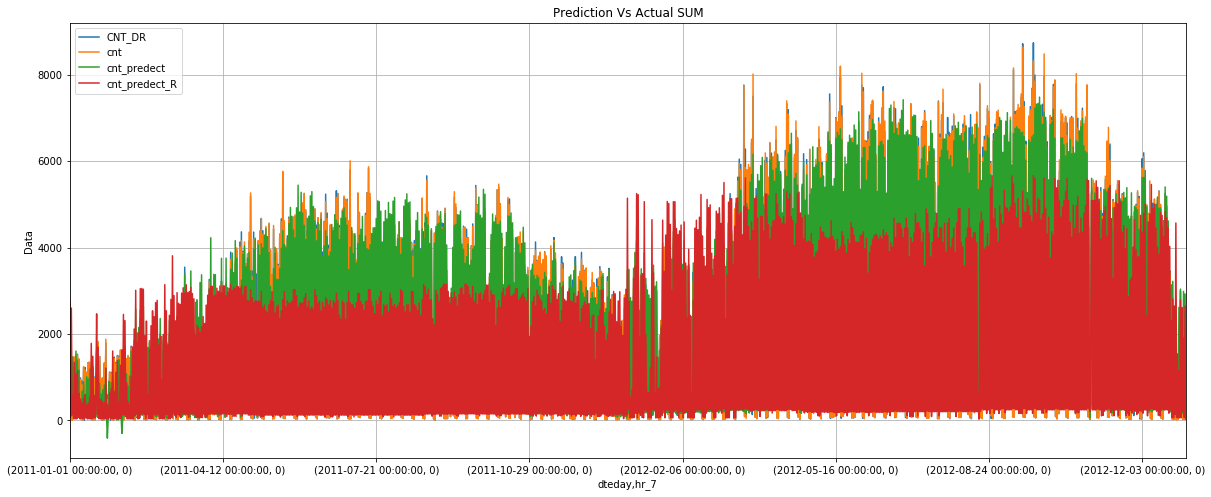

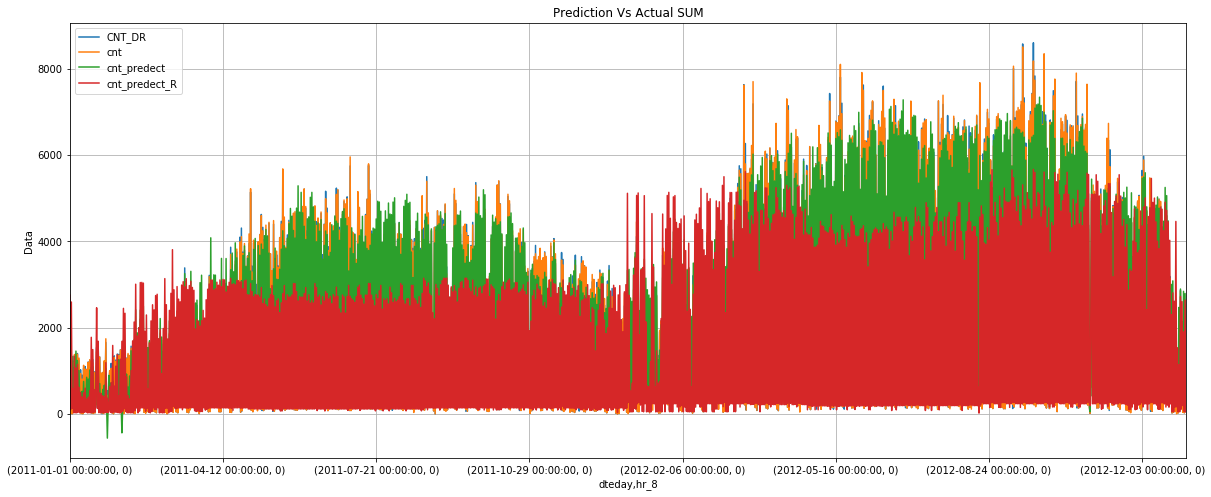

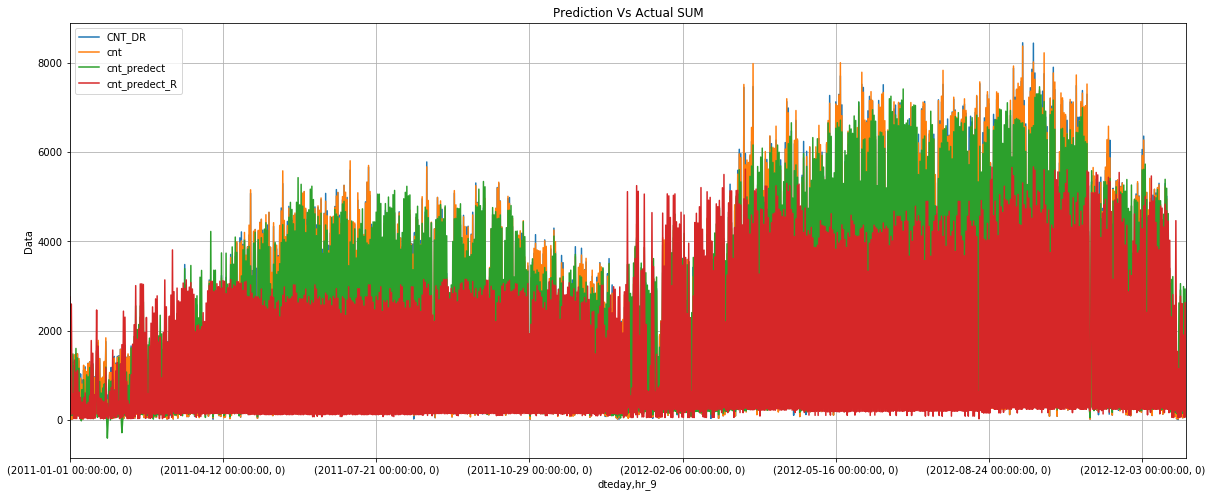

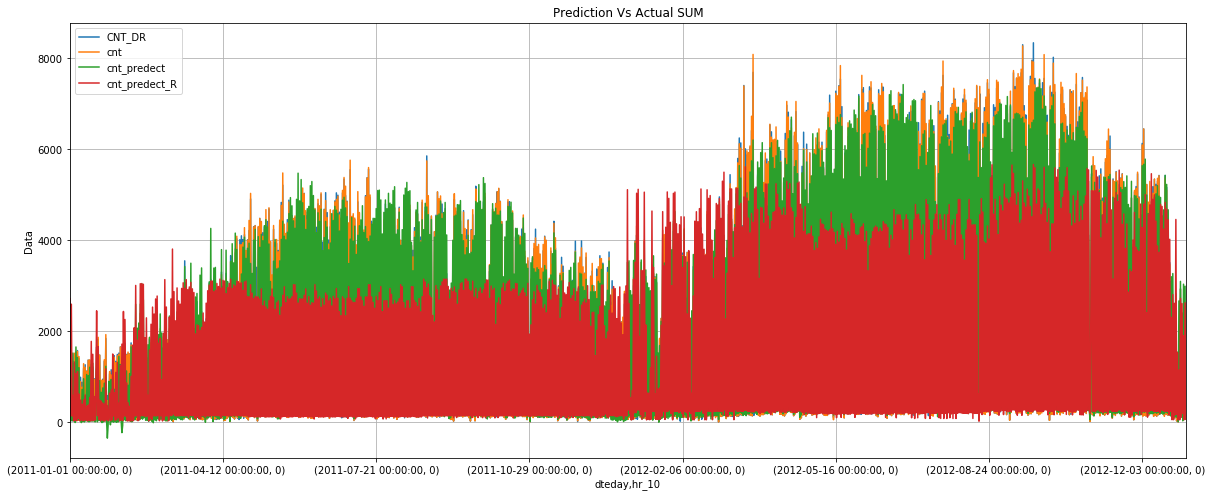

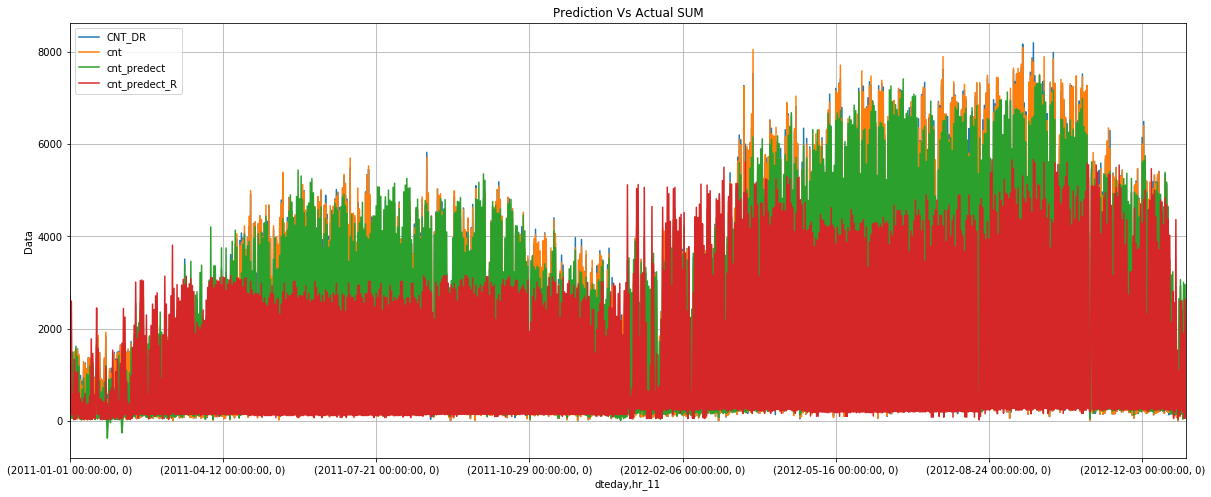

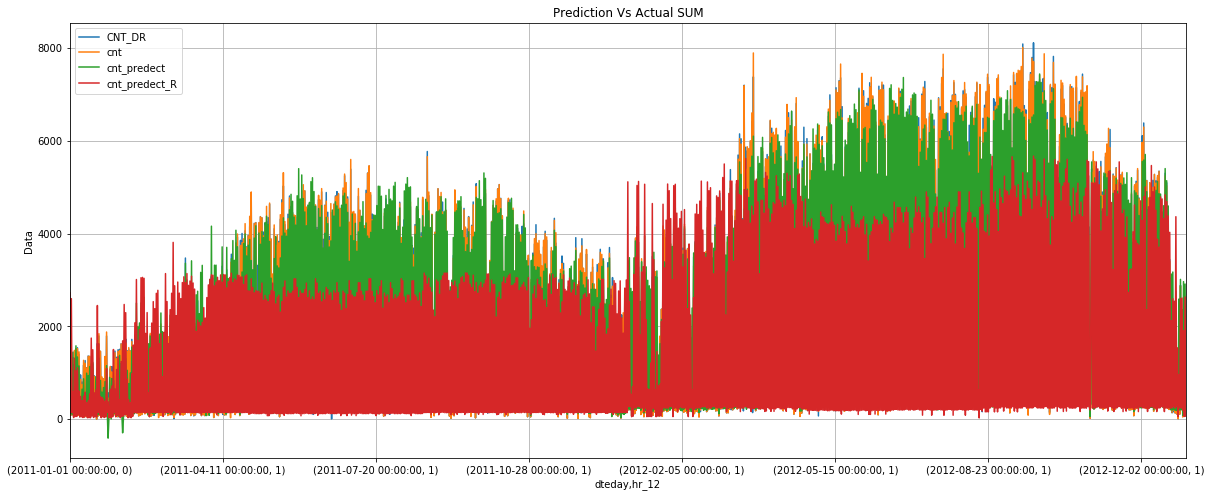

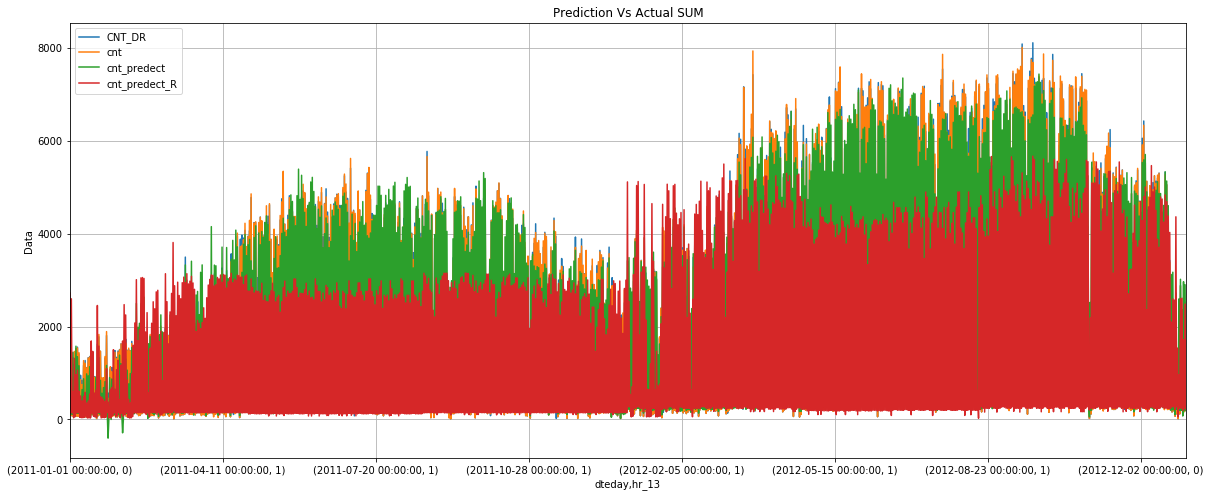

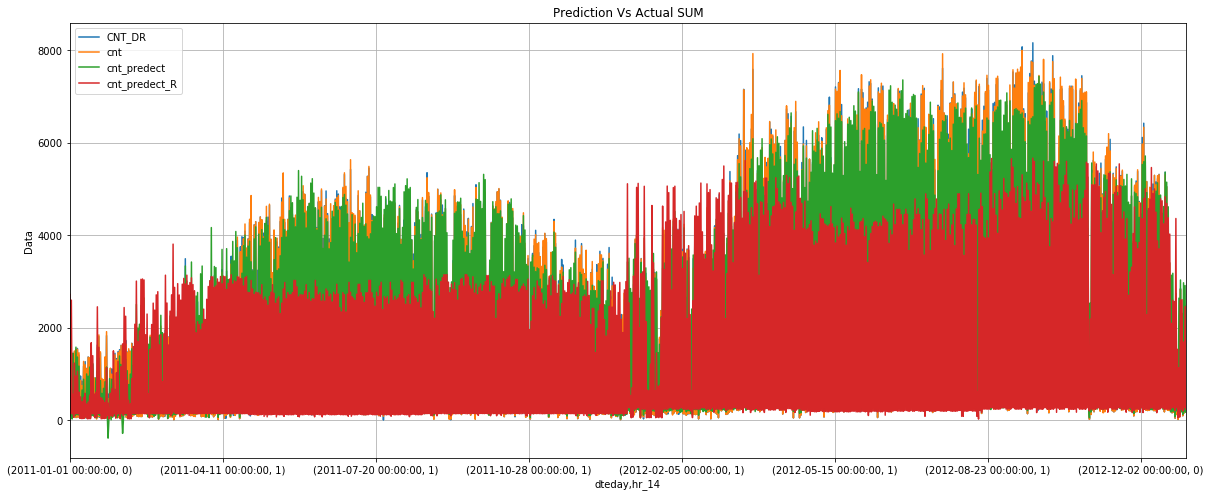

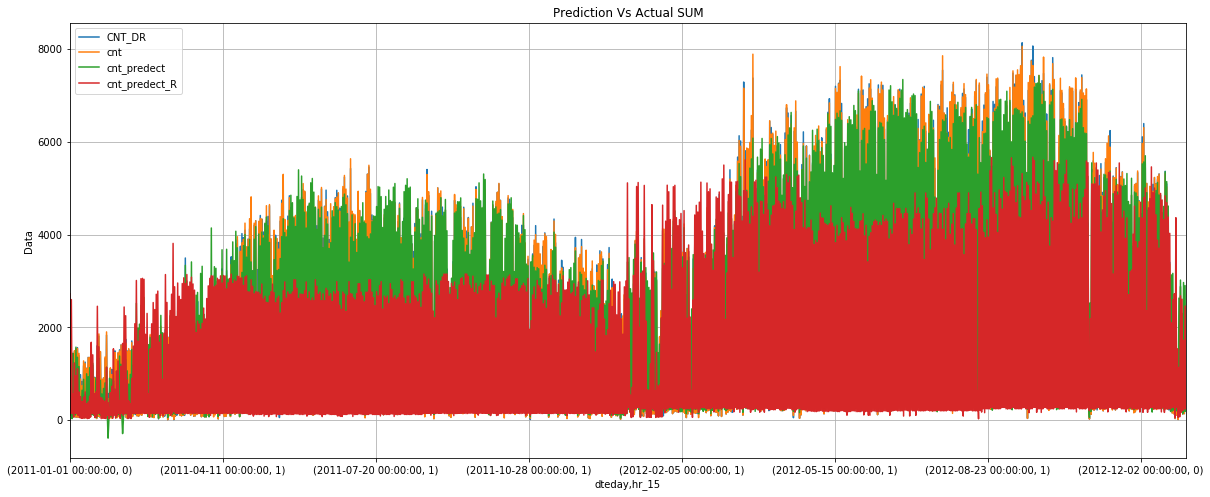

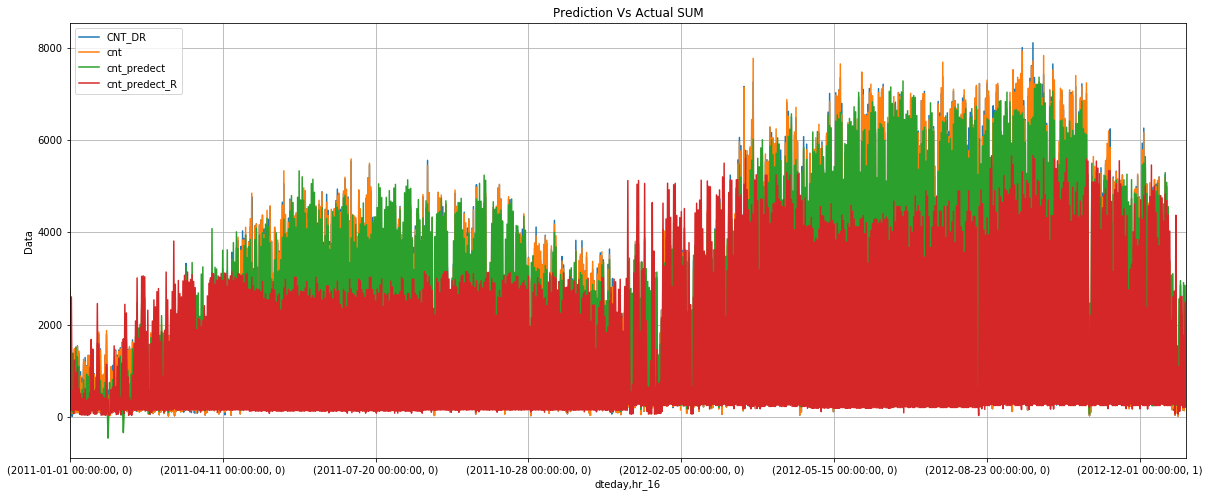

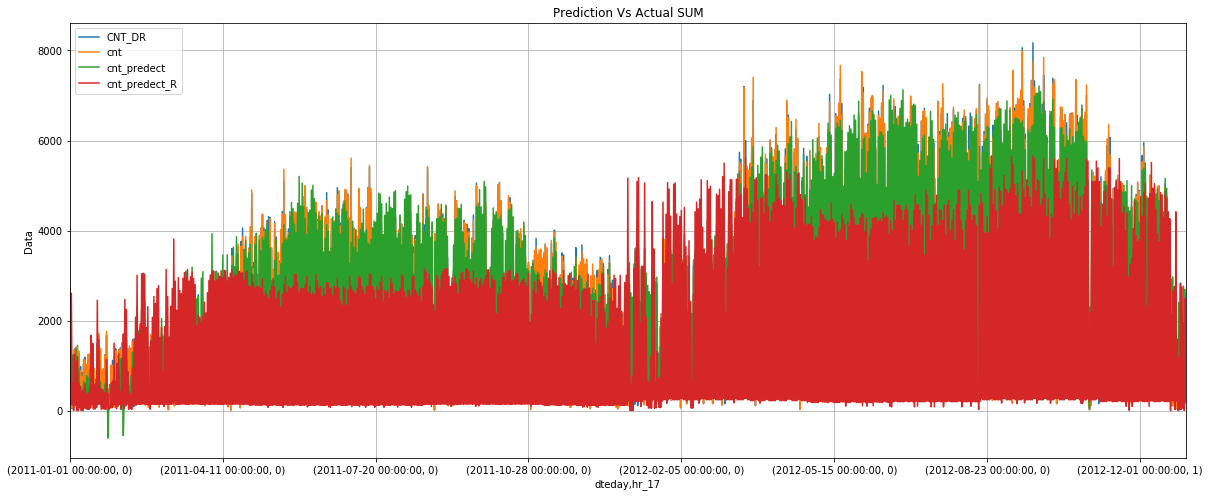

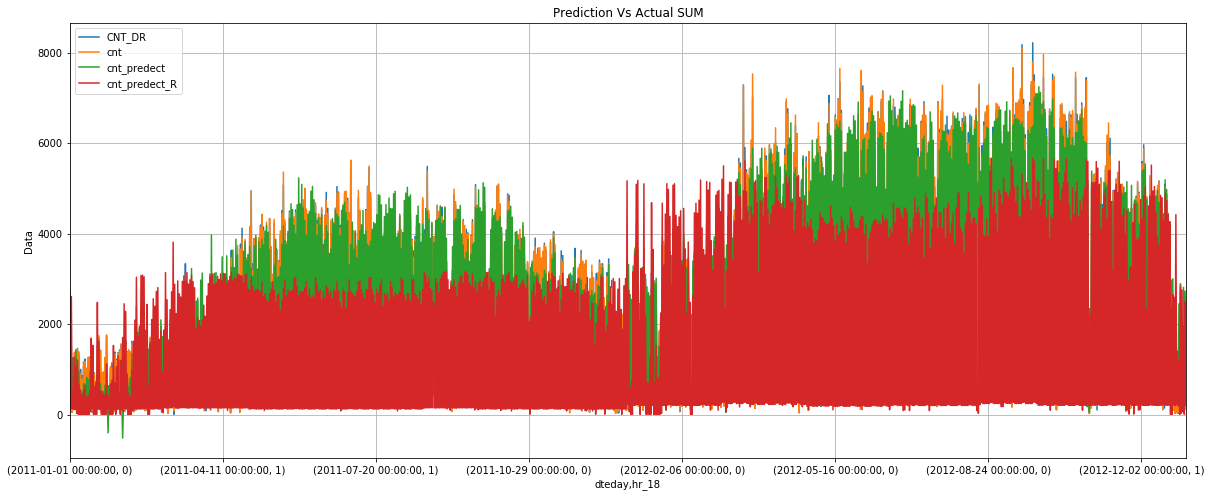

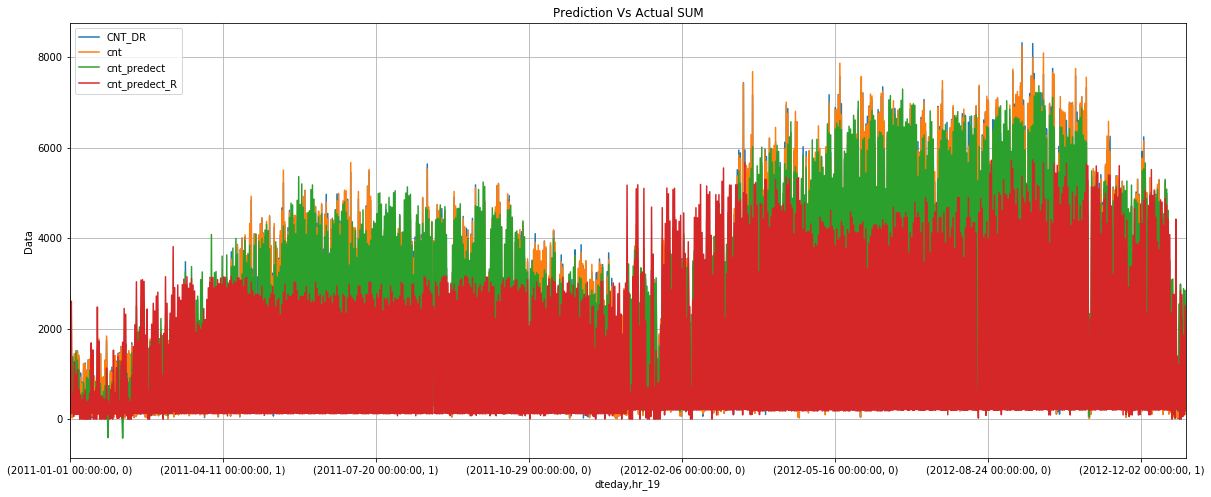

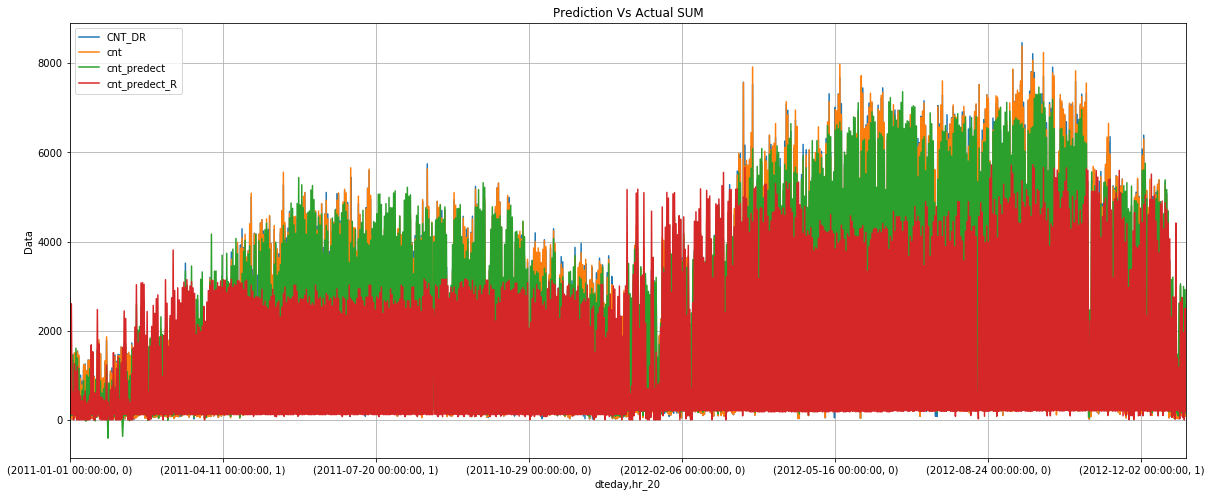

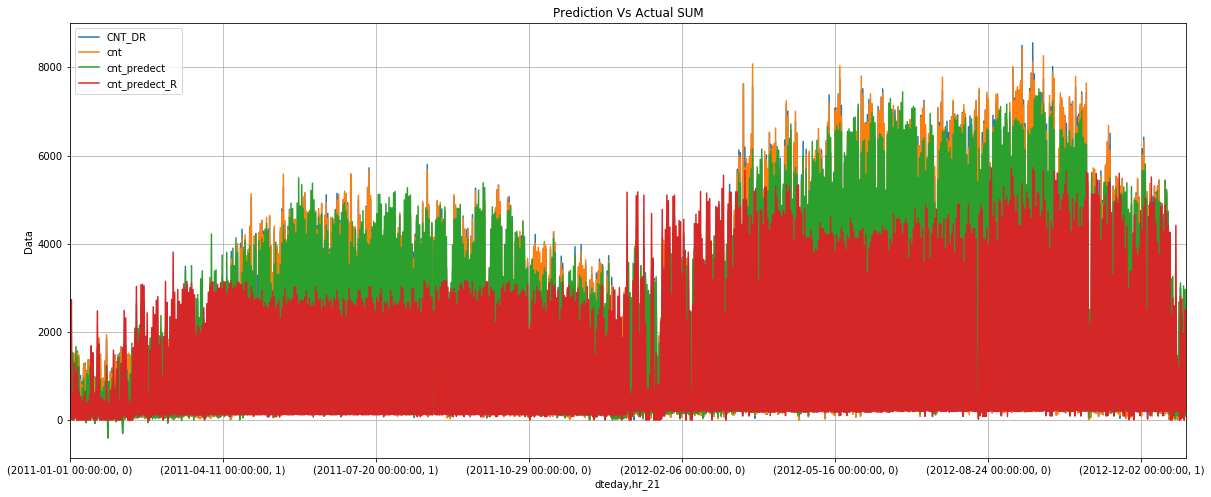

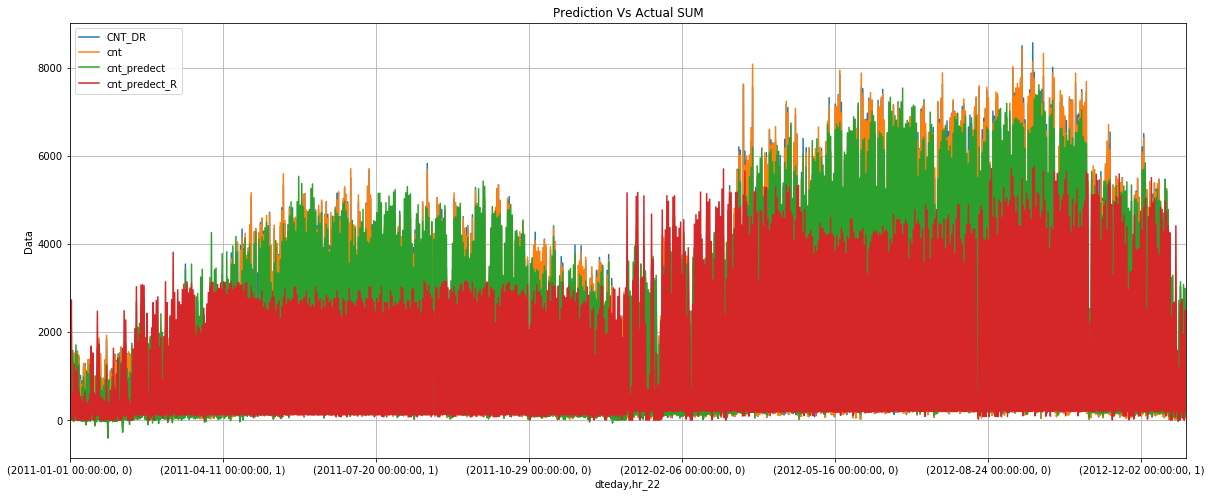

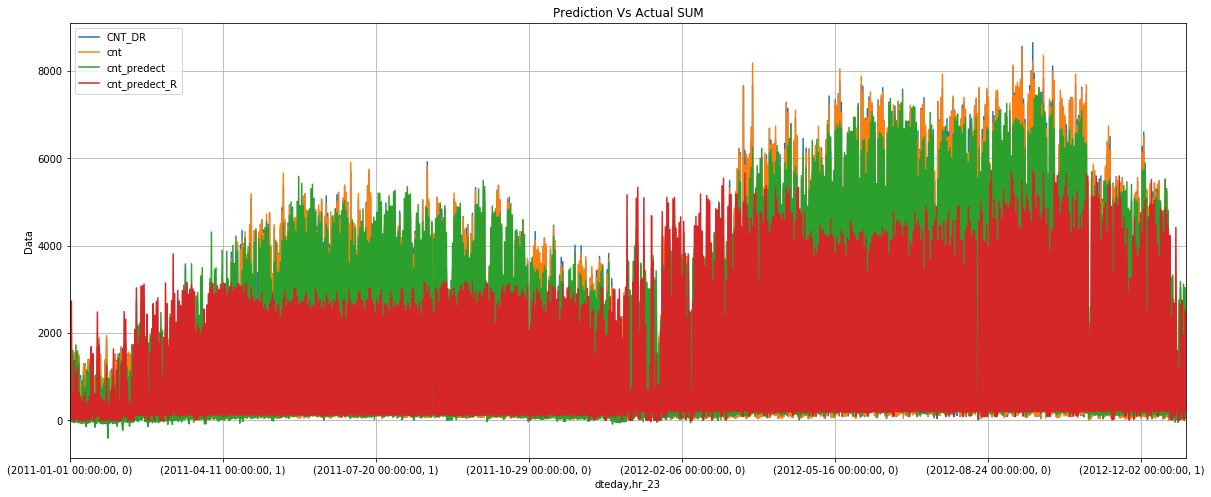

In [474]:
for col in MOD_READY.filter(regex='hr').columns:
    Model_Plot = MOD_READY.pivot_table(index=['dteday',col] , margins=False ,values=['cnt',  'cnt_predect','cnt_predect_R','CNT_DR'],aggfunc=np.sum)
    Model_Plot.plot(figsize=(20,8), title="Prediction Vs Actual SUM", grid=True)
    plt.ylabel('Data')

In [341]:
import umap
from sklearn.datasets import load_digits

digits = MOD_READY

embedding = umap.UMAP().fit_transform(digits)

In [342]:
embedding.shape

(17379, 2)

In [343]:
embedding

array([[14.003435 , 10.886199 ],
       [14.370155 , 10.719599 ],
       [14.410035 , 10.744831 ],
       ...,
       [ 6.065716 , -4.867895 ],
       [ 7.6992106, -5.3349705],
       [ 9.325971 , -5.899655 ]], dtype=float32)

Text(0.5, 1.0, 'UMAP projection of the mode ready data')

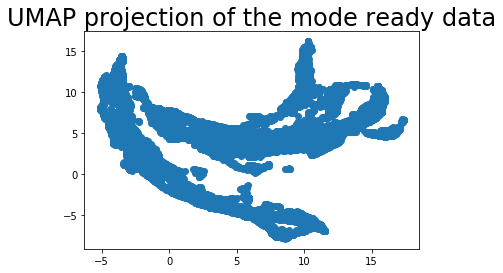

In [344]:
plt.scatter(embedding[:, 0], embedding[:, 1])#, c=[sns.color_palette()[x] for x in digits.cnt[0]])
#plt.gca().set_aspect('atemp', 'season')
plt.title('UMAP projection of the mode ready data', fontsize=24)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


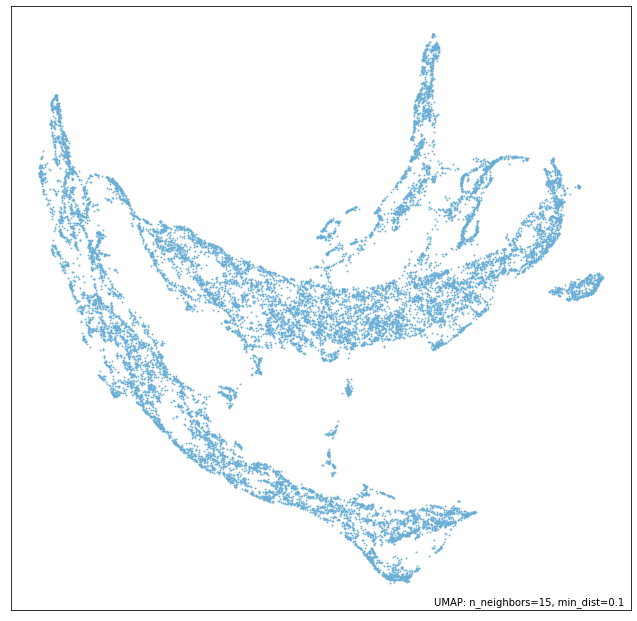

In [345]:
import umap
import umap.plot
from sklearn.datasets import load_digits

digits = load_digits()

mapper = umap.UMAP().fit(MOD_READY)
umap.plot.points(mapper)#, labels=MOD_READY)